In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix, silhouette_score, davies_bouldin_score
from scipy.stats import probplot
from sklearn.decomposition import PCA


In [110]:
df_train_original = pd.read_csv('Credit Score.csv')
df_train = df_train_original.copy()
df_train.head()

C:\Users\root\AppData\Local\Temp\ipykernel_13960\2878882337.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('Credit Score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [112]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [113]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [114]:
#Drop kolom
drop_columns = ['ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)

In [115]:
# #Drop kolom karena outliers
# drop_columns = ['Amount_invested_monthly']
# df_train.drop(drop_columns,axis=1,inplace=True)

In [116]:
# #Drop kolom karena multicolinearity
# drop_columns = ['Annual_Income','Monthly_Inhand_Salary']
# df_train.drop(drop_columns,axis=1,inplace=True)

In [117]:
numericals = df_train.select_dtypes(include='number').columns.tolist()
categorical = df_train.select_dtypes(include='object').columns.tolist()

print(f"Numerical columns are {numericals}")
print(f"Categorical columns are {categorical}")

Numerical columns are ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Categorical columns are ['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [118]:
#detail kolom 
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #Tipe data
    print("\nTipe Data: ",df[column].dtype)
    
    #Kosong atau tidak ?
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nTidak ada value yang kosong")
    elif count_null>0:
        print("\nAda ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nUnik: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [119]:
#mengisi missing value
def fill_missing_with(df, column):      
    print("\nSebelum diisi:",df[column].isnull().sum())
    
    df[column]=df[column].fillna(df[column].median())
    
    print("\nSesudah diisi:",df[column].isnull().sum())

In [120]:
#mengisi missing value dengan groupby
def fill_groupby(df, column):
    groupby='Occupation'      
    print("\nSebelum diisi:",df[column].isnull().sum())
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mean())
    df[column] = df[column].fillna(mode_per_group)
    print("\nSesudah diisi:",df[column].isnull().sum())

In [121]:
def fill_missing(df, column):
    #fill_groupby(df_train, column_name)
    fill_missing_with(df_train, column_name)

In [122]:
#Label Encoding
def ubah_label(df, column):
    from sklearn.preprocessing import LabelEncoder

    categorical_columns = [column]
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    df_train[column] = label_encoder.fit_transform(df_train[column])
    print(label_encoder.classes_)

In [123]:
def regex(df, column, sampah=None,dummy=''):
    if sampah!=None:
        df[column] = df[column].replace(sampah,dummy)
        print(f"\nSampah {sampah} is replaced with Blank")

In [124]:
#desimal Scaling
def dec_scaling(df, column):
    df[column] = df[column].values.reshape(len(df), 1)/100
    df[column]

In [125]:
#pengolahan categorical
def cat_process(df, column, sampah=None, dummy=''):
    regex(df, column, sampah,dummy)
    ubah_label(df, column)
    #dec_scaling(df_train, column_name)

In [126]:
#penanganan outliers menggunakan quantile
def anti_outliers(df, column):
    
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    print(Q1)
    print(Q3)
    print(IQR)
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
        
    df_train[column] = pd.DataFrame(np.where(df_train[column] >= upper, upper, 
        (np.where(df_train[column] <= lower, lower, df_train[column]))), columns=[column])
        



In [127]:
#penanganan outliers dengan winsorize atau persentase
from scipy.stats.mstats import winsorize
def anti_outliers_winsorize(df, column):
    a=df[column]
    df[column]=winsorize(a, limits=[0.1, 0.2])

In [128]:
#Pengolahan Numerikal
def num_process(df, column, strip=None, datatype=None, sampah=None):
    #regex(df, column, sampah)
    #ngresiki strip
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")
        
    #ganti datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")
    #anti_outliers(df_train, column_name)
    #anti_outliers_winsorize(df_train, column_name)
    #dec_scaling(df_train, column_name)

In [129]:
#plot outlier
def plot(df, column):
    plt.figure(figsize=(20,10))
    sns.boxplot(df_train[column], color="skyblue")
    plt.tight_layout()
    
    z = np.abs(stats.zscore(df_train[column]))
    print(z)

#categorical

In [130]:
#Credit Score
column_name = 'Credit_Score'

get_column_details(df_train, column_name)
cat_process(df_train, column_name)



Details of Credit_Score column

Tipe Data:  object

Tidak ada value yang kosong

Unik:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64
['Good' 'Poor' 'Standard']


In [131]:
#Occupation
column_name = 'Occupation'
sampah = '_______'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Occupation'].isnull().sum()



Sampah _______ is replaced with Blank
['' 'Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer'
 'Entrepreneur' 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager'
 'Musician' 'Scientist' 'Teacher' 'Writer']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Occupation column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  16

Distribution of column:

0     7062
8     6575
2     6355
5     6350
13    6299
10    6291
1     6271
3     6235
11    6232
14    6215
6     6174
4     6087
7     6085
9     5973
12    5911
15    5885
Name: Occupation, dtype: int64


0

In [132]:
#Type_of_Loan
column_name = 'Type_of_Loan'
sampah = '_______'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Type_of_Loan'].isnull().sum()



Sampah _______ is replaced with Blank
['Auto Loan'
 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan'
 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan'
 ... 'Student Loan, and Personal Loan' 'Student Loan, and Student Loan'
 nan]

Sebelum diisi: 0

Sesudah diisi: 0
Details of Type_of_Loan column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  6261

Distribution of column:

6260    11408
3463     1408
684      1280
4878     1272
1410     1264
        ...  
3762        8
4491        8
1464        8
5652        8
4913        8
Name: Type_of_Loan, Length: 6261, dtype: int64


0

In [133]:
#Credit_Mix
column_name = 'Credit_Mix'
sampah = '_'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Credit_Mix'].isnull().sum()



Sampah _ is replaced with Blank
['' 'Bad' 'Good' 'Standard']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Credit_Mix column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  4

Distribution of column:

3    36479
2    24337
0    20195
1    18989
Name: Credit_Mix, dtype: int64


0

In [134]:
#Credit_History_Age
column_name = 'Credit_History_Age'
sampah = 'NA'

def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
    
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)
fill_missing(df_train, column_name)
print(df_train['Credit_History_Age'])
df_train['Credit_History_Age'].isnull().sum()


Sebelum diisi: 9030

Sesudah diisi: 0
0        265.0
1        219.0
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64


0

In [135]:
#Payment_Of_Min_Amount
column_name = 'Payment_of_Min_Amount'
sampah = 'NM'

cat_process(df_train, column_name,sampah)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Payment_of_Min_Amount'].isnull().sum()



Sampah NM is replaced with Blank
['' 'No' 'Yes']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Payment_of_Min_Amount column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  3

Distribution of column:

2    52326
1    35667
0    12007
Name: Payment_of_Min_Amount, dtype: int64


0

In [136]:
#Payment_Behaviour
column_name = 'Payment_Behaviour'
sampah = '!@9#%8'
dummy = 'Unknown'

cat_process(df_train, column_name,sampah,dummy)
fill_missing(df_train, column_name)
get_column_details(df_train, column_name)
df_train
df_train['Payment_Behaviour'].isnull().sum()


Sampah !@9#%8 is replaced with Blank
['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'Unknown']

Sebelum diisi: 0

Sesudah diisi: 0
Details of Payment_Behaviour column

Tipe Data:  int32

Tidak ada value yang kosong

Unik:  7

Distribution of column:

5    25513
1    17540
4    13861
0    13721
2    11340
3    10425
6     7600
Name: Payment_Behaviour, dtype: int64


0

In [137]:
#Month
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month
df_train['Month'].isnull().sum()

0

#Numerical


Trailing & leading _ are removed

Datatype of Age is changed to <class 'int'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.127724
1        0.127724
2        0.889847
3        0.127724
4        0.127724
           ...   
99995    0.124810
99996    0.124810
99997    0.124810
99998    0.124810
99999    0.124810
Name: Age, Length: 100000, dtype: float64


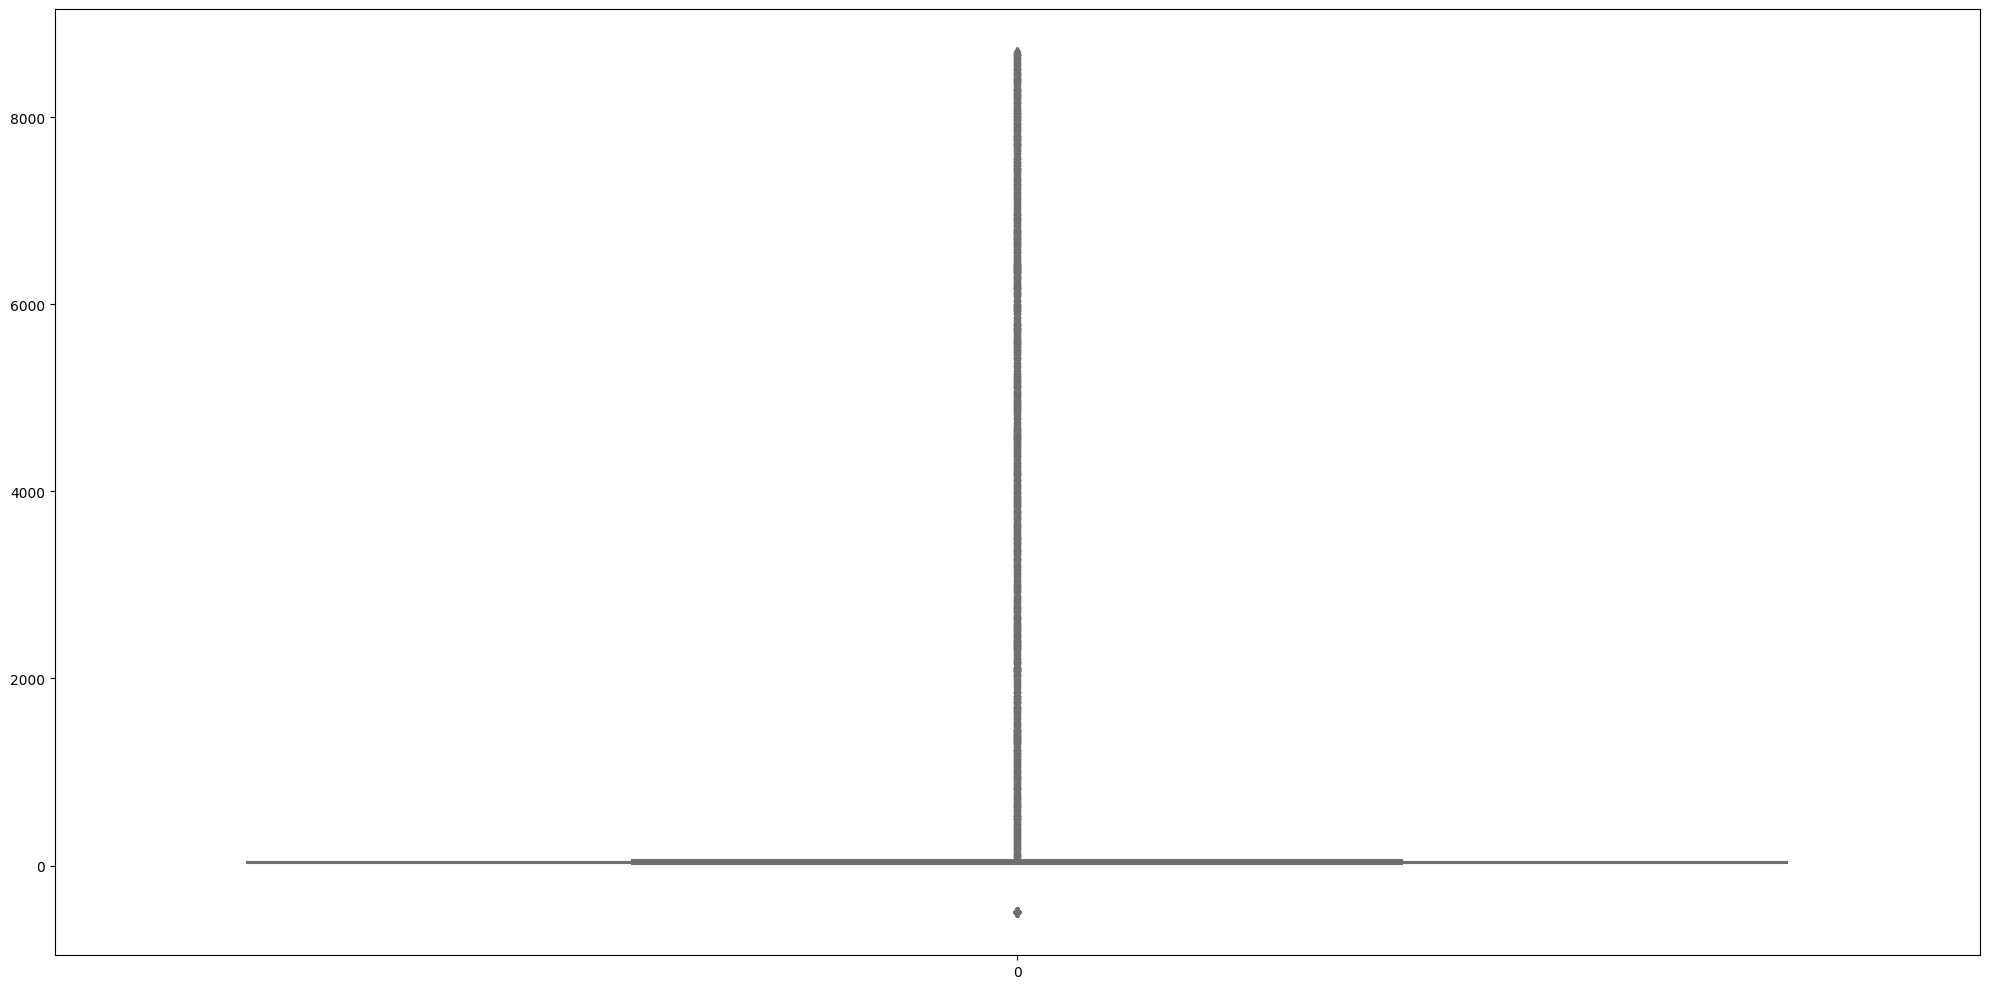

In [138]:
#Age
column_name = 'Age'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Annual_Income is changed to <class 'float'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.110031
1        0.110031
2        0.110031
3        0.110031
4        0.110031
           ...   
99995    0.095681
99996    0.095681
99997    0.095681
99998    0.095681
99999    0.095681
Name: Annual_Income, Length: 100000, dtype: float64


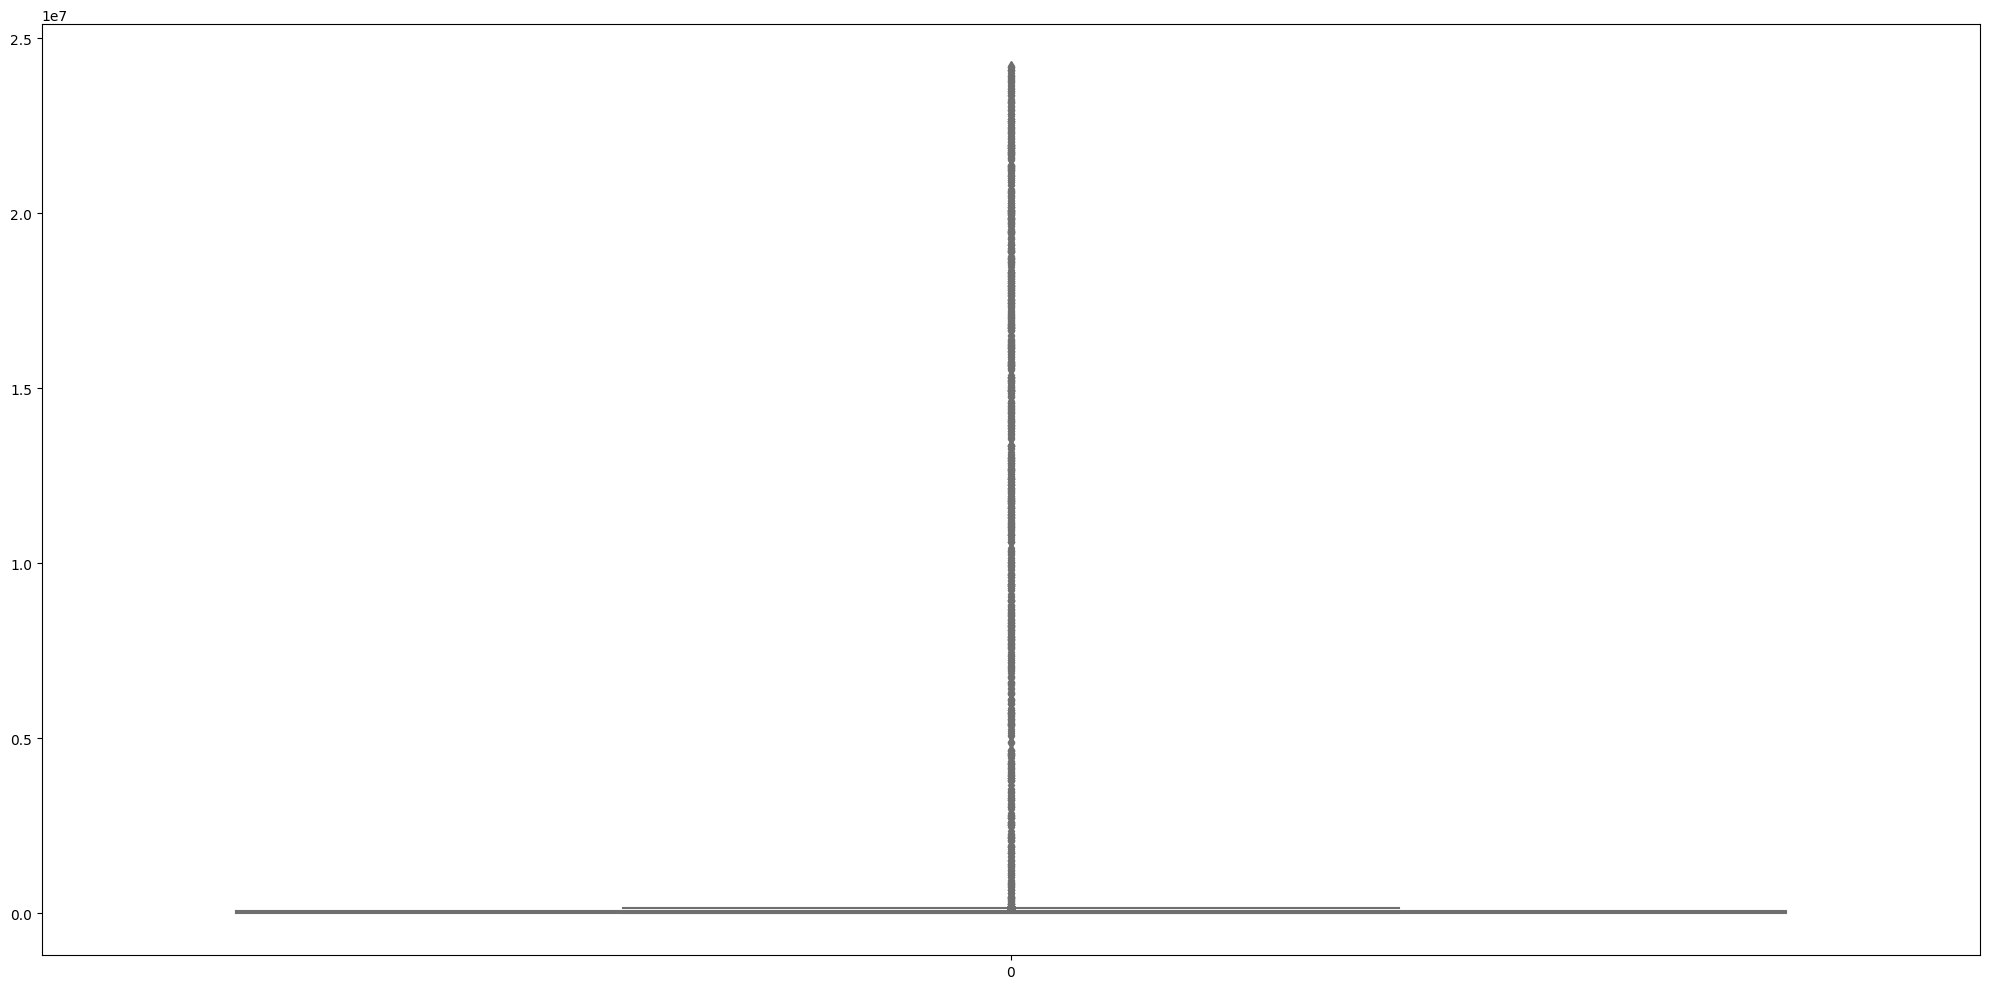

In [139]:
#multicolinear
#Annual Income
column_name = 'Annual_Income'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Monthly_Inhand_Salary is changed to <class 'float'>

Sebelum diisi: 15002

Sesudah diisi: 0
0        0.744337
1        0.315849
2        0.315849
3        0.315849
4        0.744337
           ...   
99995    0.226137
99996    0.226137
99997    0.226137
99998    0.226137
99999    0.226137
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64


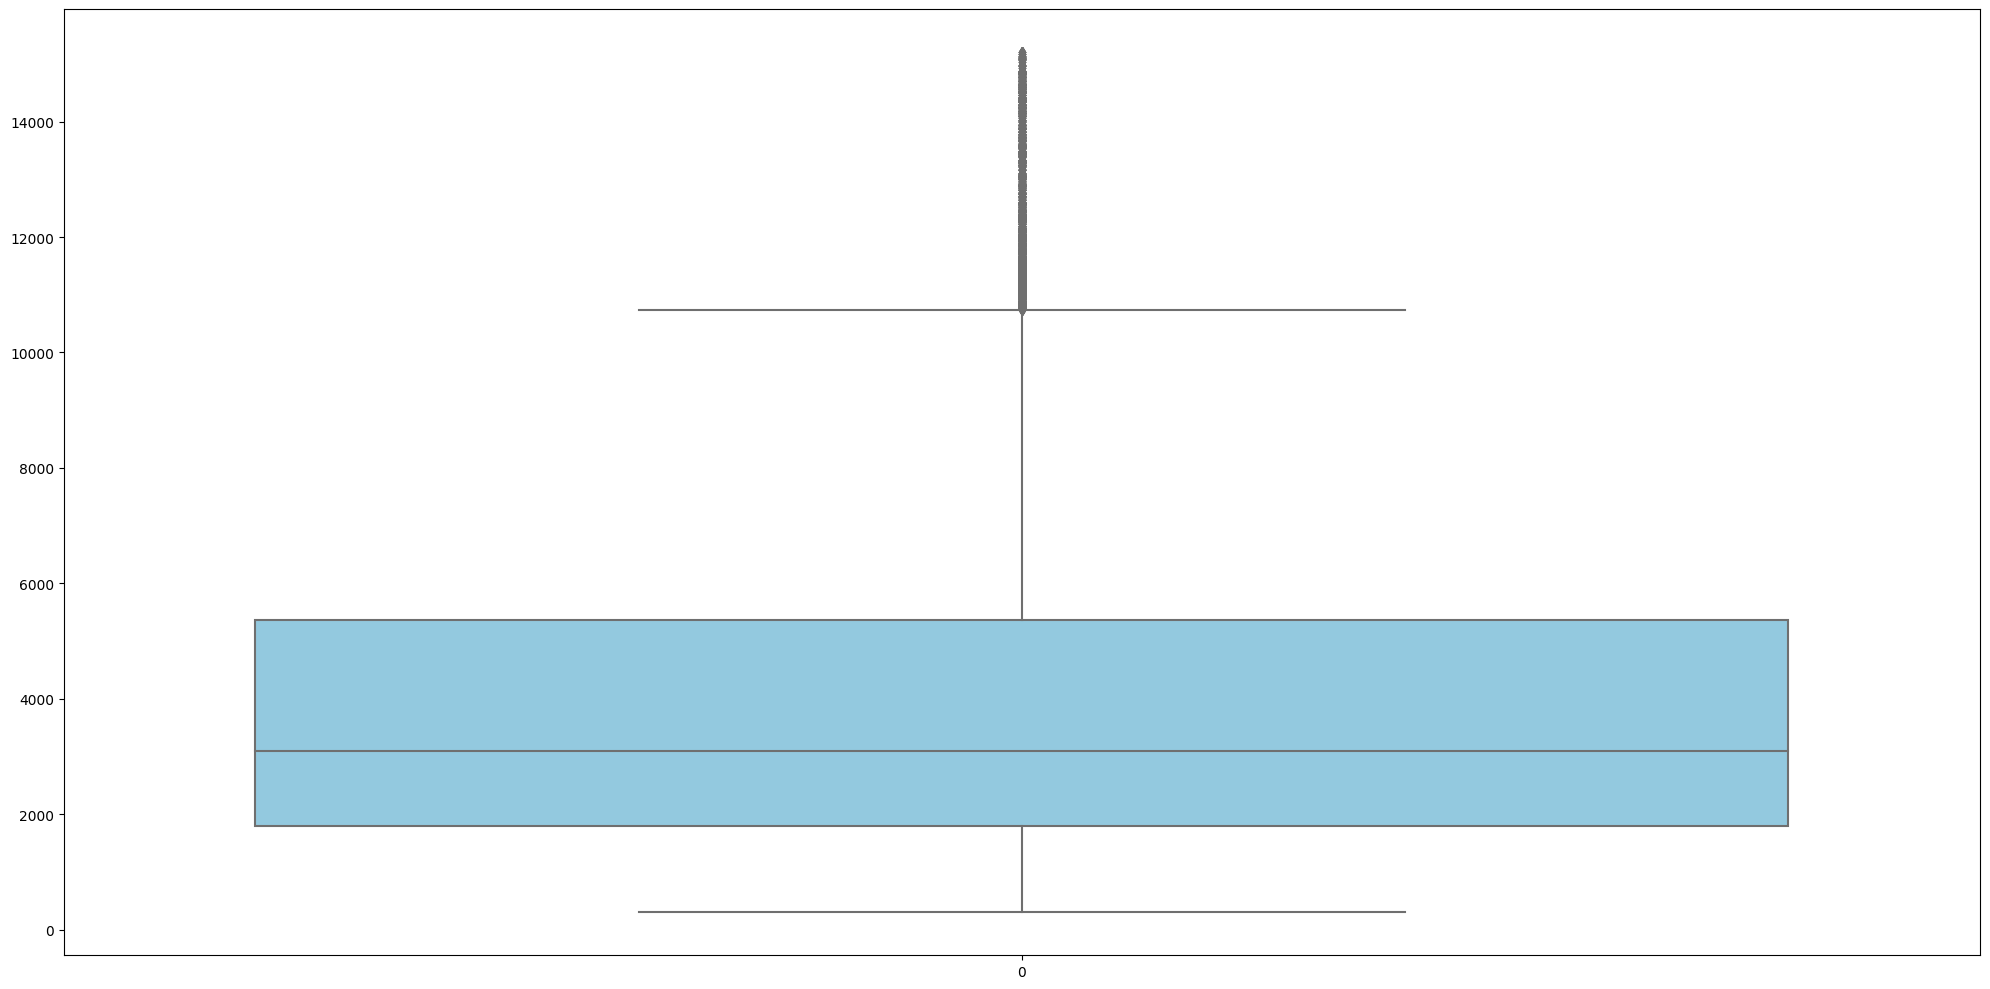

In [140]:
#multicolinear
#Monthly_Inhand_Salary
column_name = 'Monthly_Inhand_Salary'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Num_Bank_Accounts is changed to <class 'int'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.120024
1        0.120024
2        0.120024
3        0.120024
4        0.120024
           ...   
99995    0.111506
99996    0.111506
99997    0.111506
99998    0.111506
99999    0.111506
Name: Num_Bank_Accounts, Length: 100000, dtype: float64


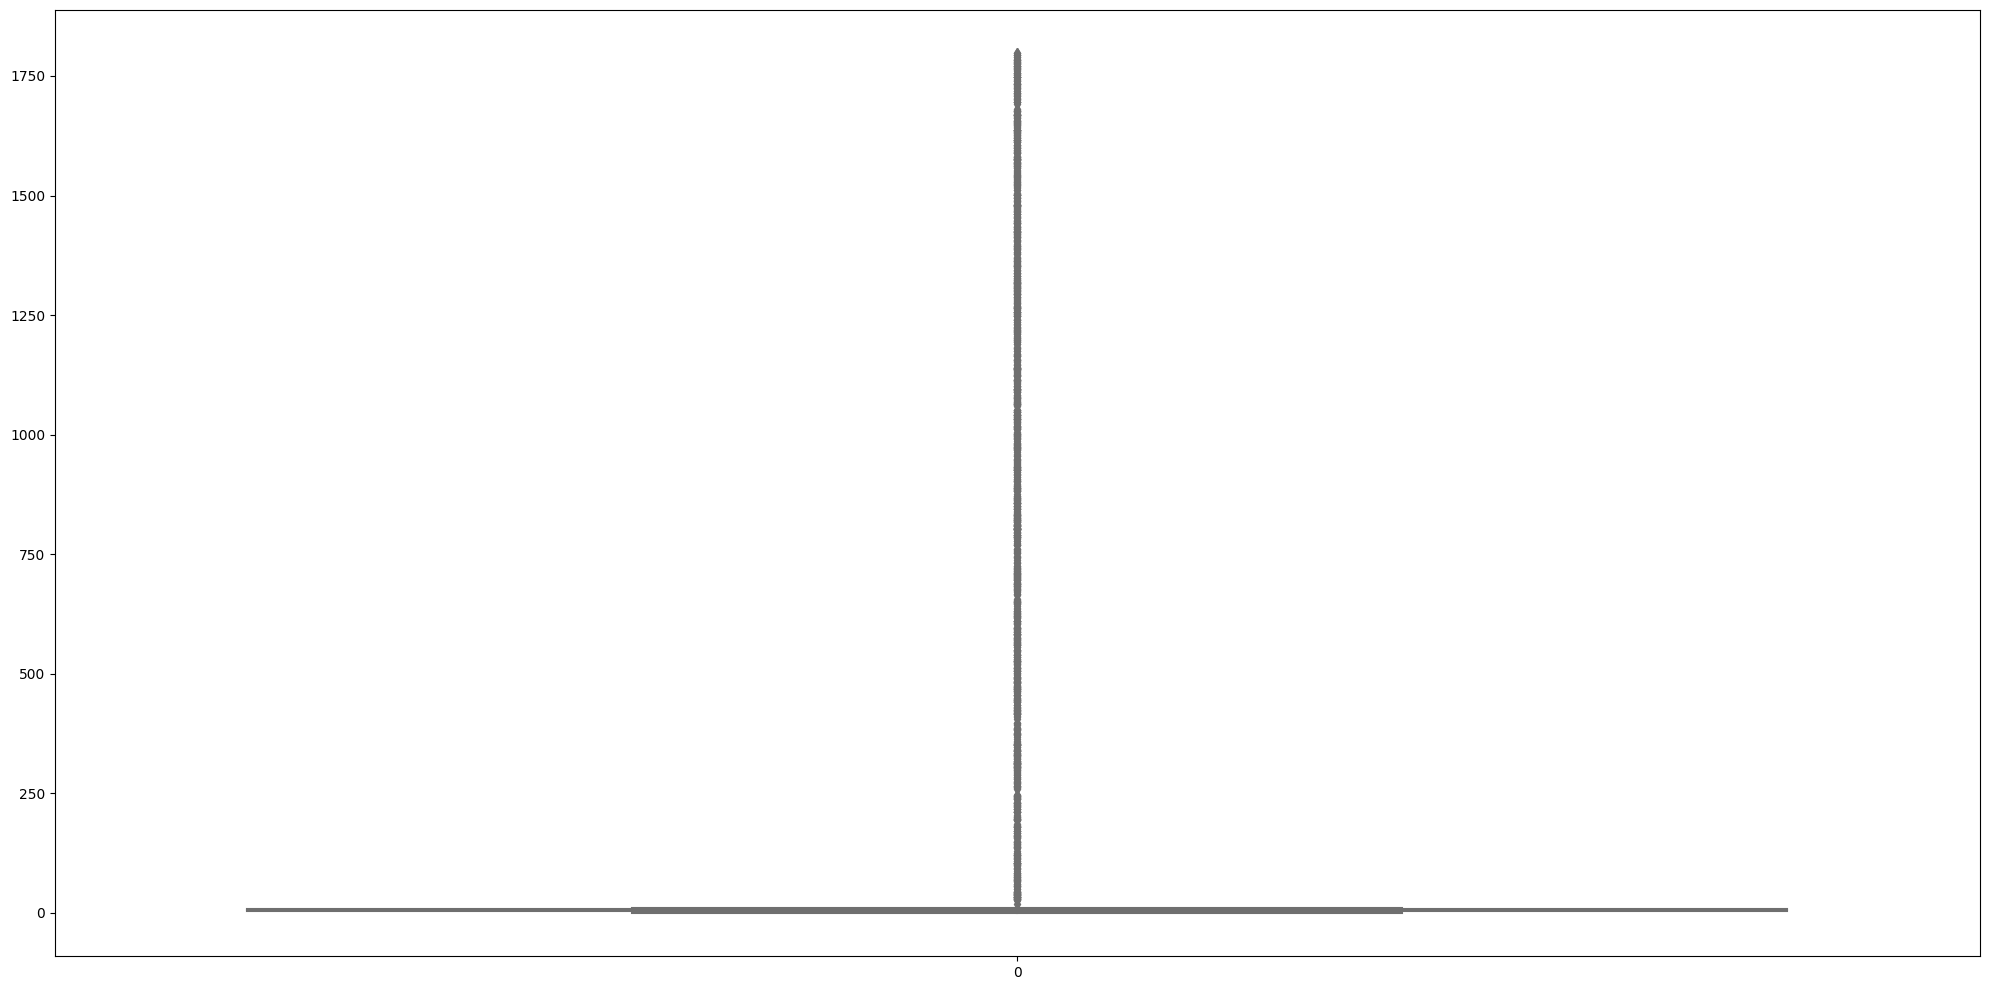

In [141]:
#Num_Bank_Accounts
column_name = 'Num_Bank_Accounts'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Num_Credit_Card is changed to <class 'int'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.143150
1        0.143150
2        0.143150
3        0.143150
4        0.143150
           ...   
99995    0.127653
99996    0.127653
99997    0.127653
99998    0.127653
99999    0.127653
Name: Num_Credit_Card, Length: 100000, dtype: float64


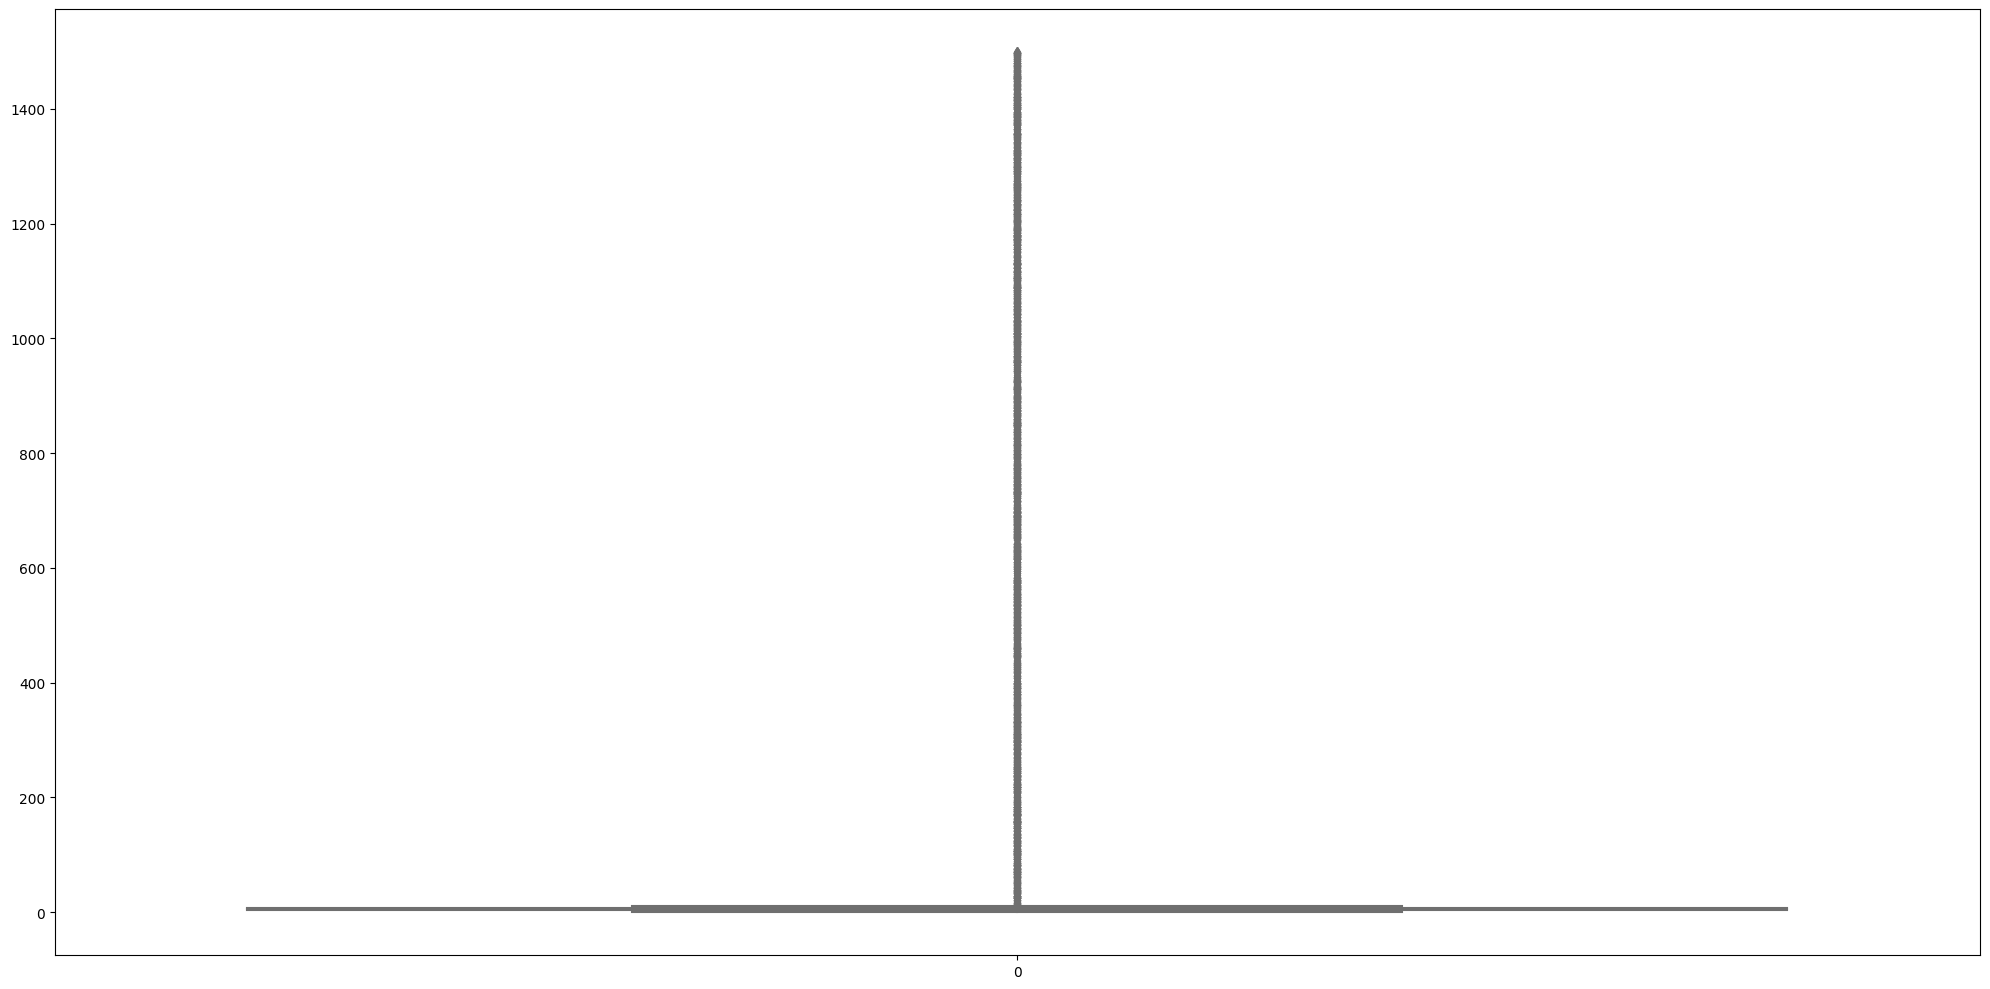

In [142]:
#Num_Credit_Card
column_name = 'Num_Credit_Card'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Interest_Rate is changed to <class 'int'>

Sebelum diisi: 0

Sesudah diisi: 0
0         0.148934
1         0.148934
2         0.148934
3         0.148934
4         0.148934
           ...    
99995     0.140358
99996     0.140358
99997    12.127547
99998     0.140358
99999     0.140358
Name: Interest_Rate, Length: 100000, dtype: float64


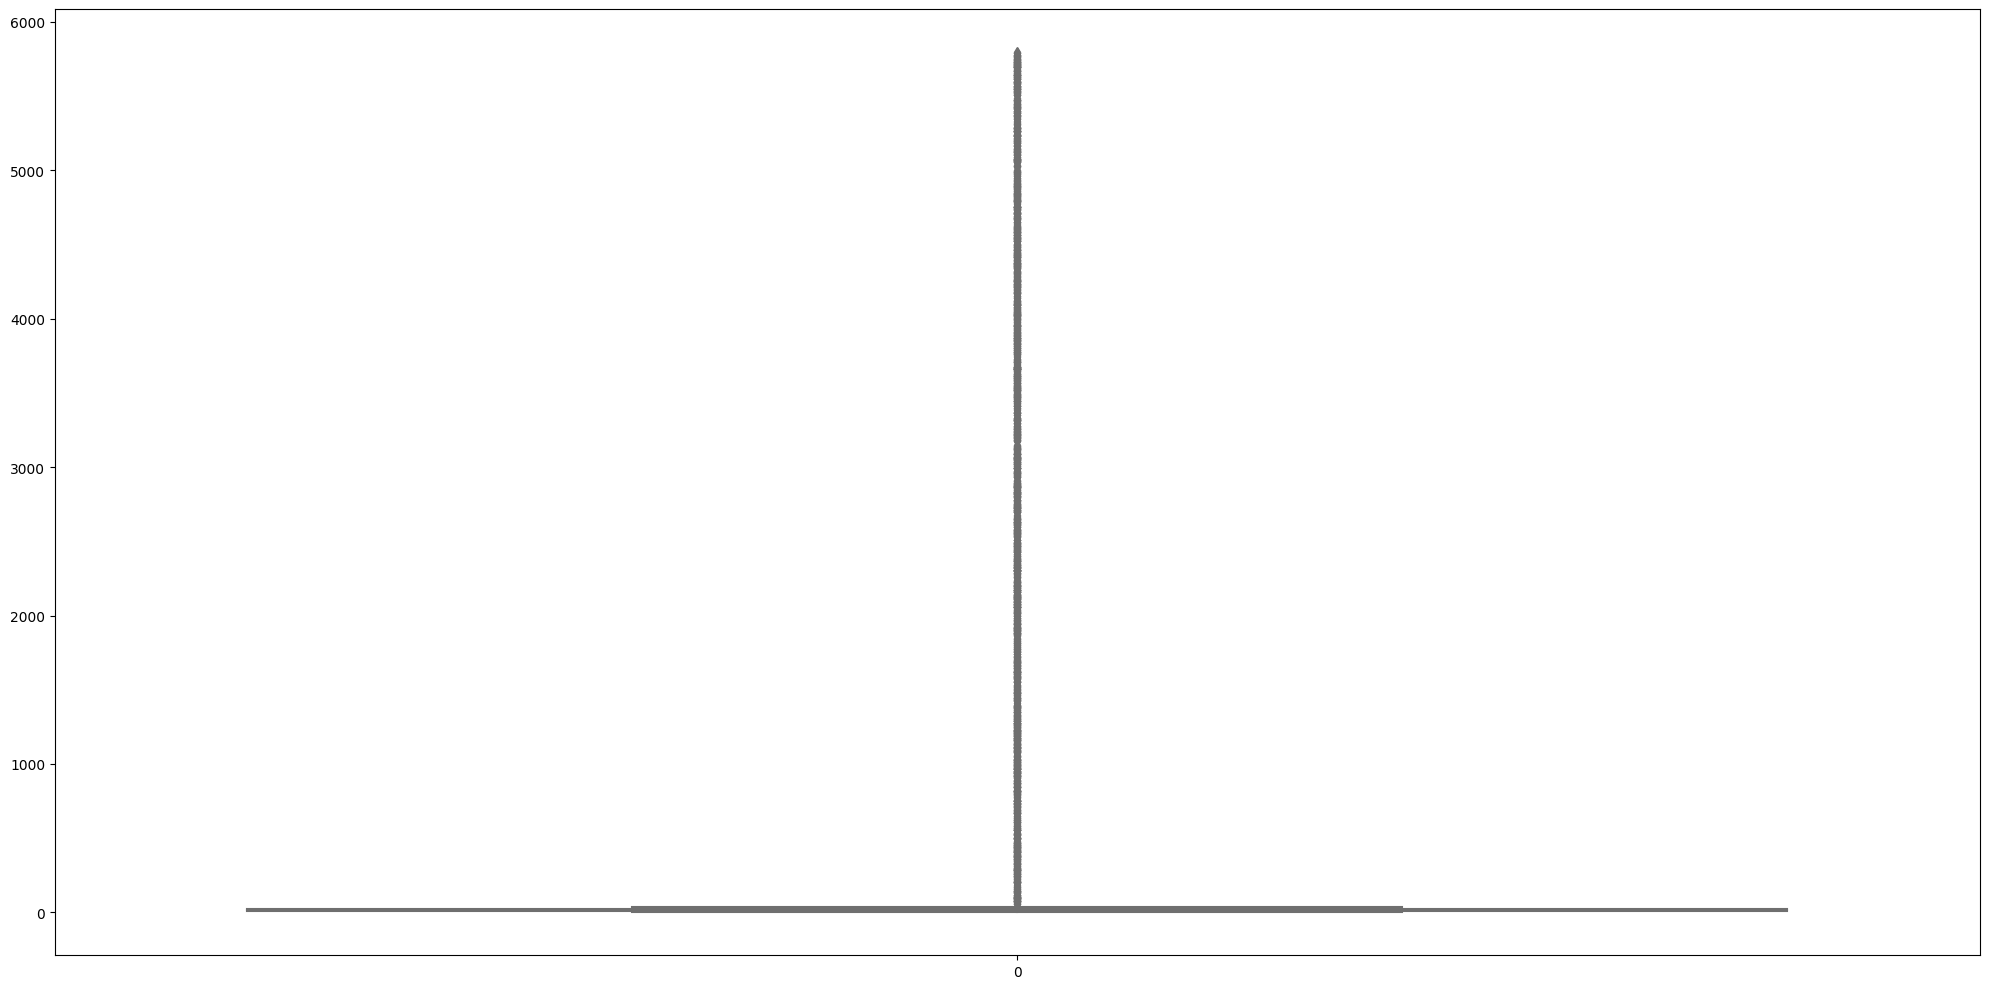

In [143]:
#Interest_Rate
column_name = 'Interest_Rate'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'int'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.015803
1        0.015803
2        0.015803
3        0.015803
4        0.015803
           ...   
99995    0.016121
99996    0.016121
99997    0.016121
99998    0.016121
99999    0.016121
Name: Num_of_Loan, Length: 100000, dtype: float64


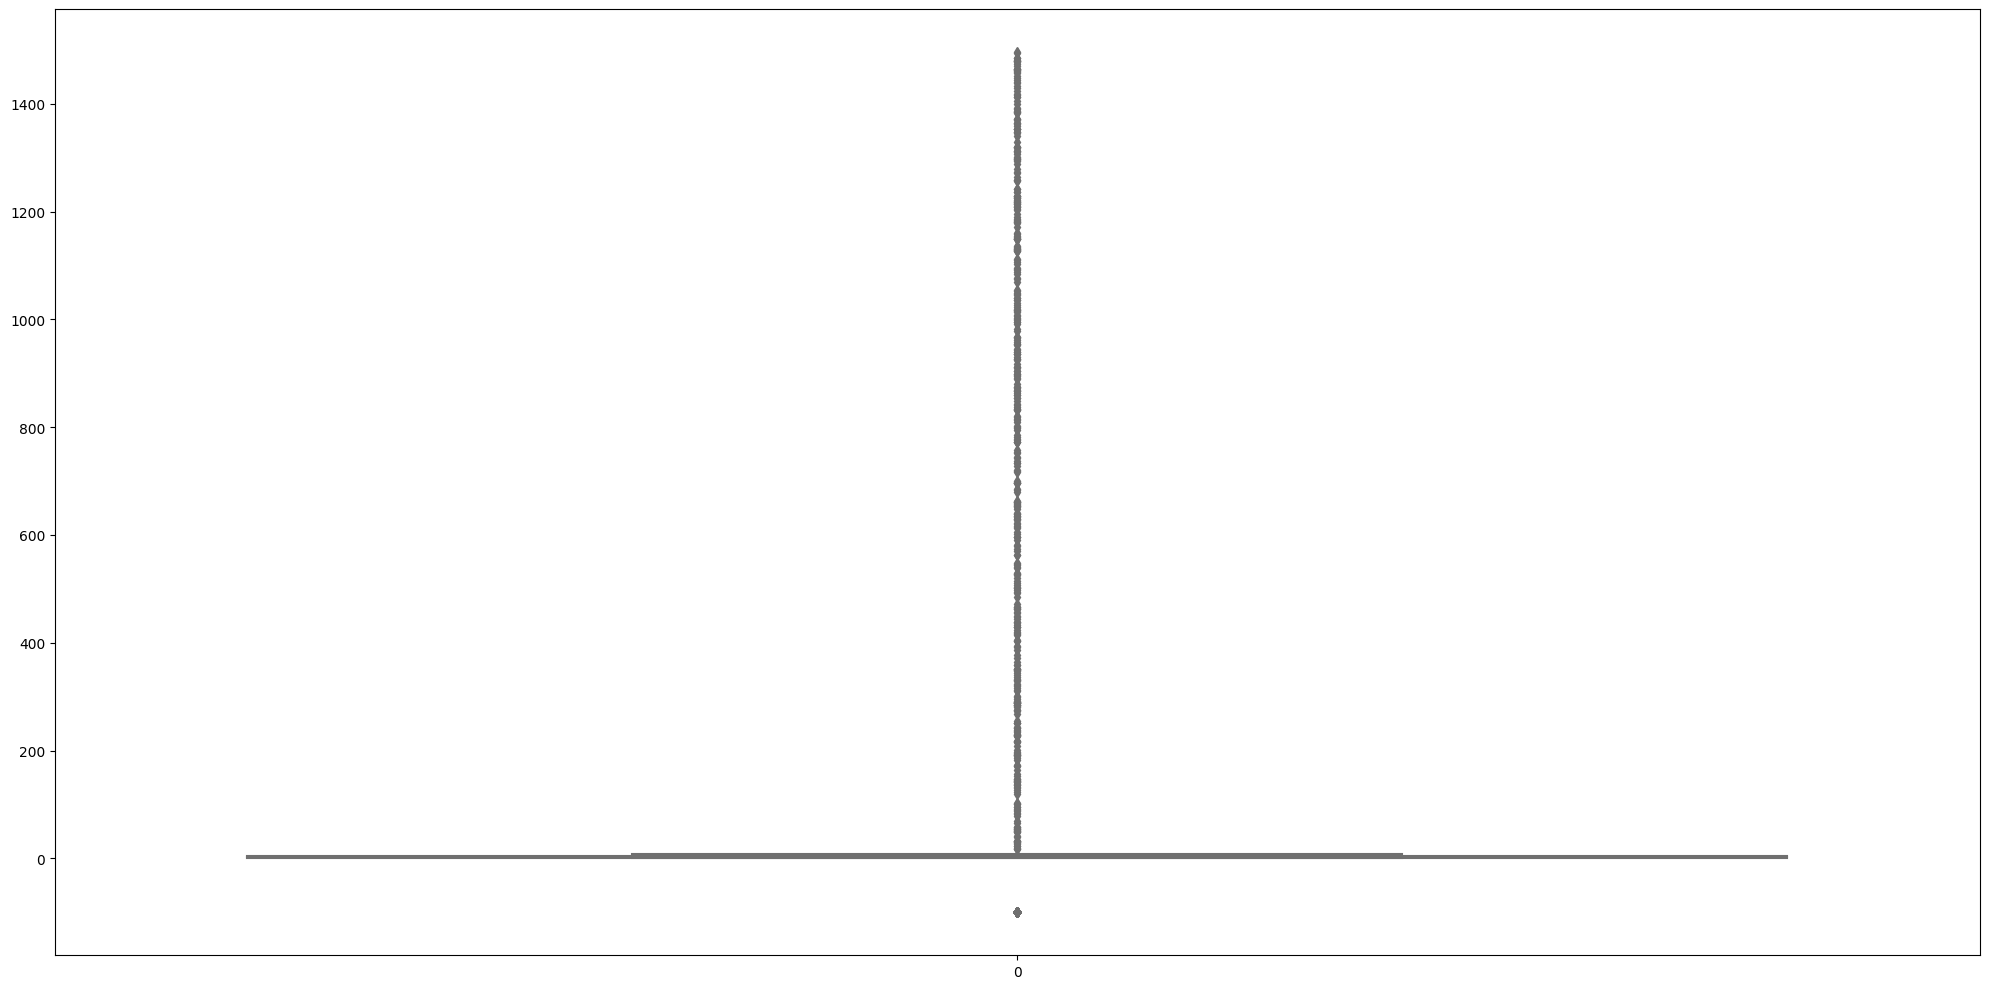

In [144]:
#Num_of_Loan
column_name = 'Num_of_Loan'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Delay_from_due_date is changed to <class 'int'>

Sebelum diisi: 0

Sesudah diisi: 0
0        1.215932
1        1.485110
2        1.215932
3        1.081342
4        1.014048
           ...   
99995    0.129961
99996    0.206512
99997    0.399139
99998    0.071923
99999    0.206512
Name: Delay_from_due_date, Length: 100000, dtype: float64


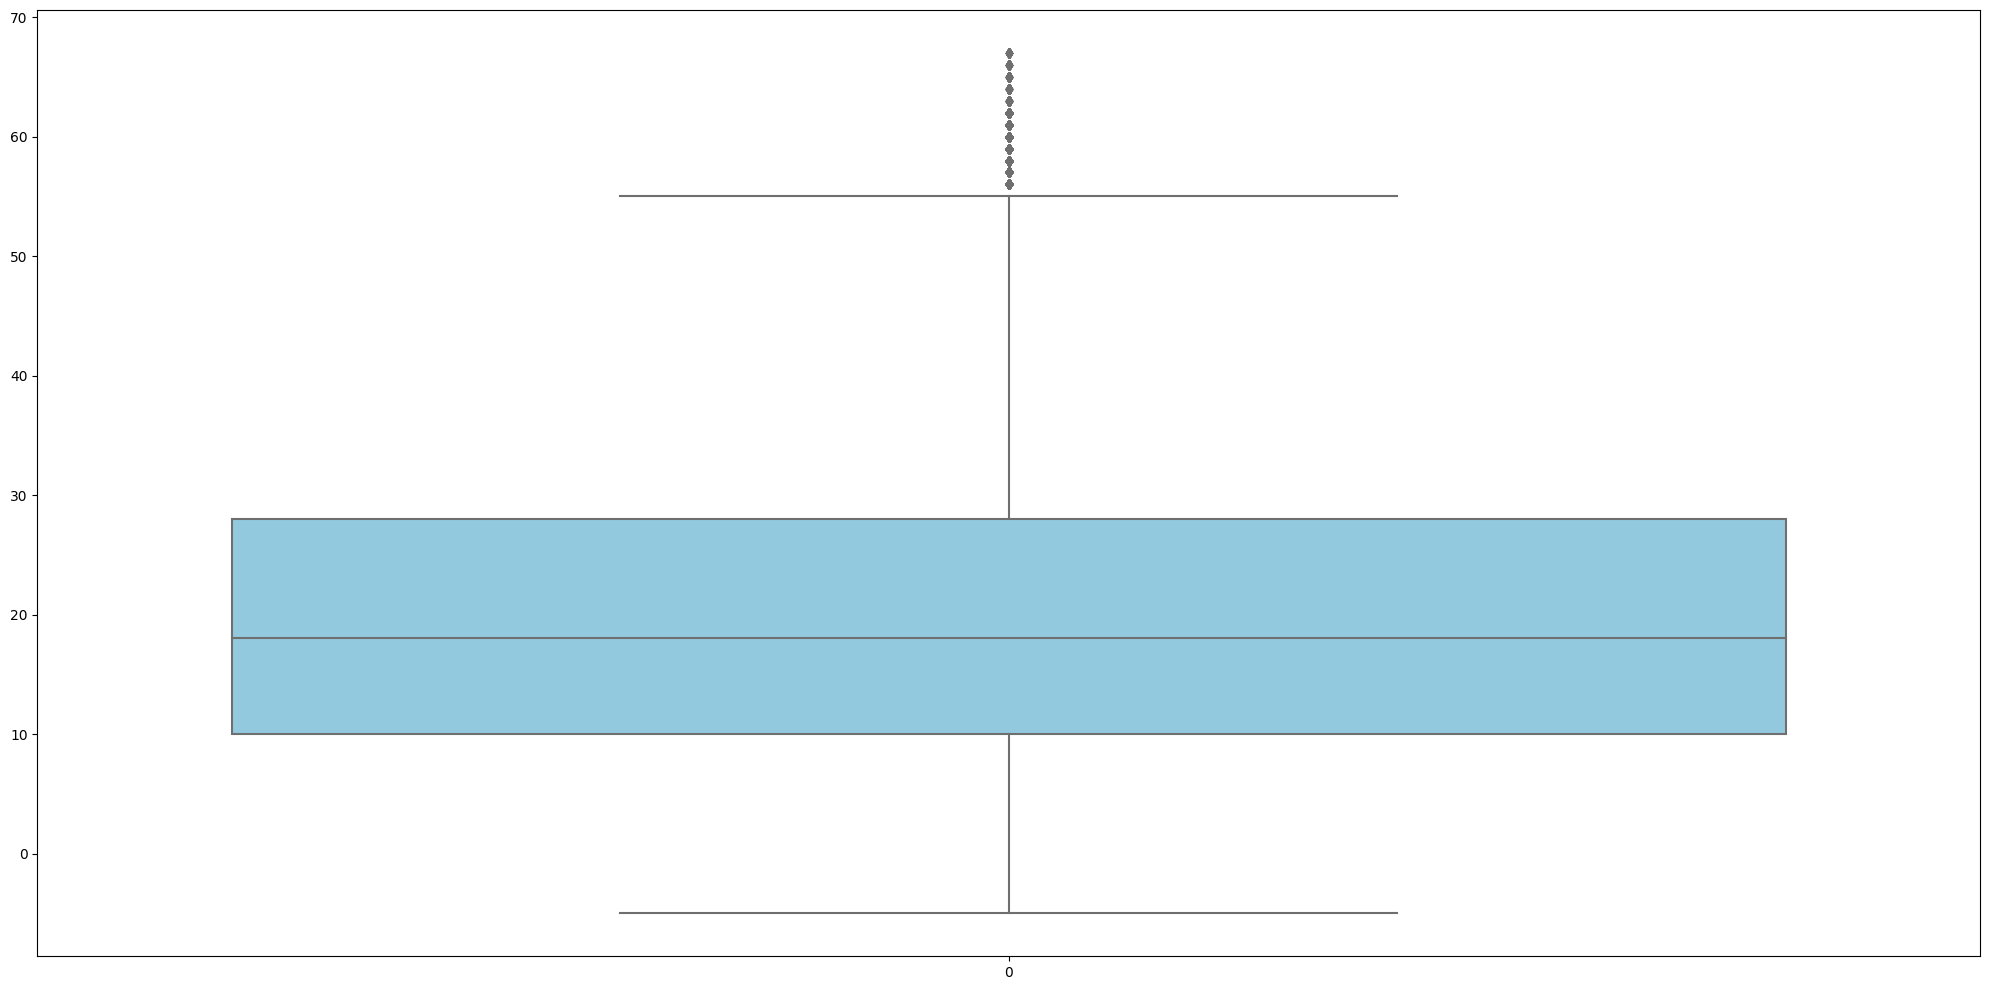

In [145]:
#Delay_from_due_date
column_name = 'Delay_from_due_date'

num_process(df_train, column_name, strip='_', datatype=int)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to <class 'float'>

Sebelum diisi: 7002

Sesudah diisi: 0
0        0.104297
1        0.072189
2        0.104297
3        0.118057
4        0.072189
           ...   
99995    0.104297
99996    0.104297
99997    0.108883
99998    0.072189
99999    0.108883
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64


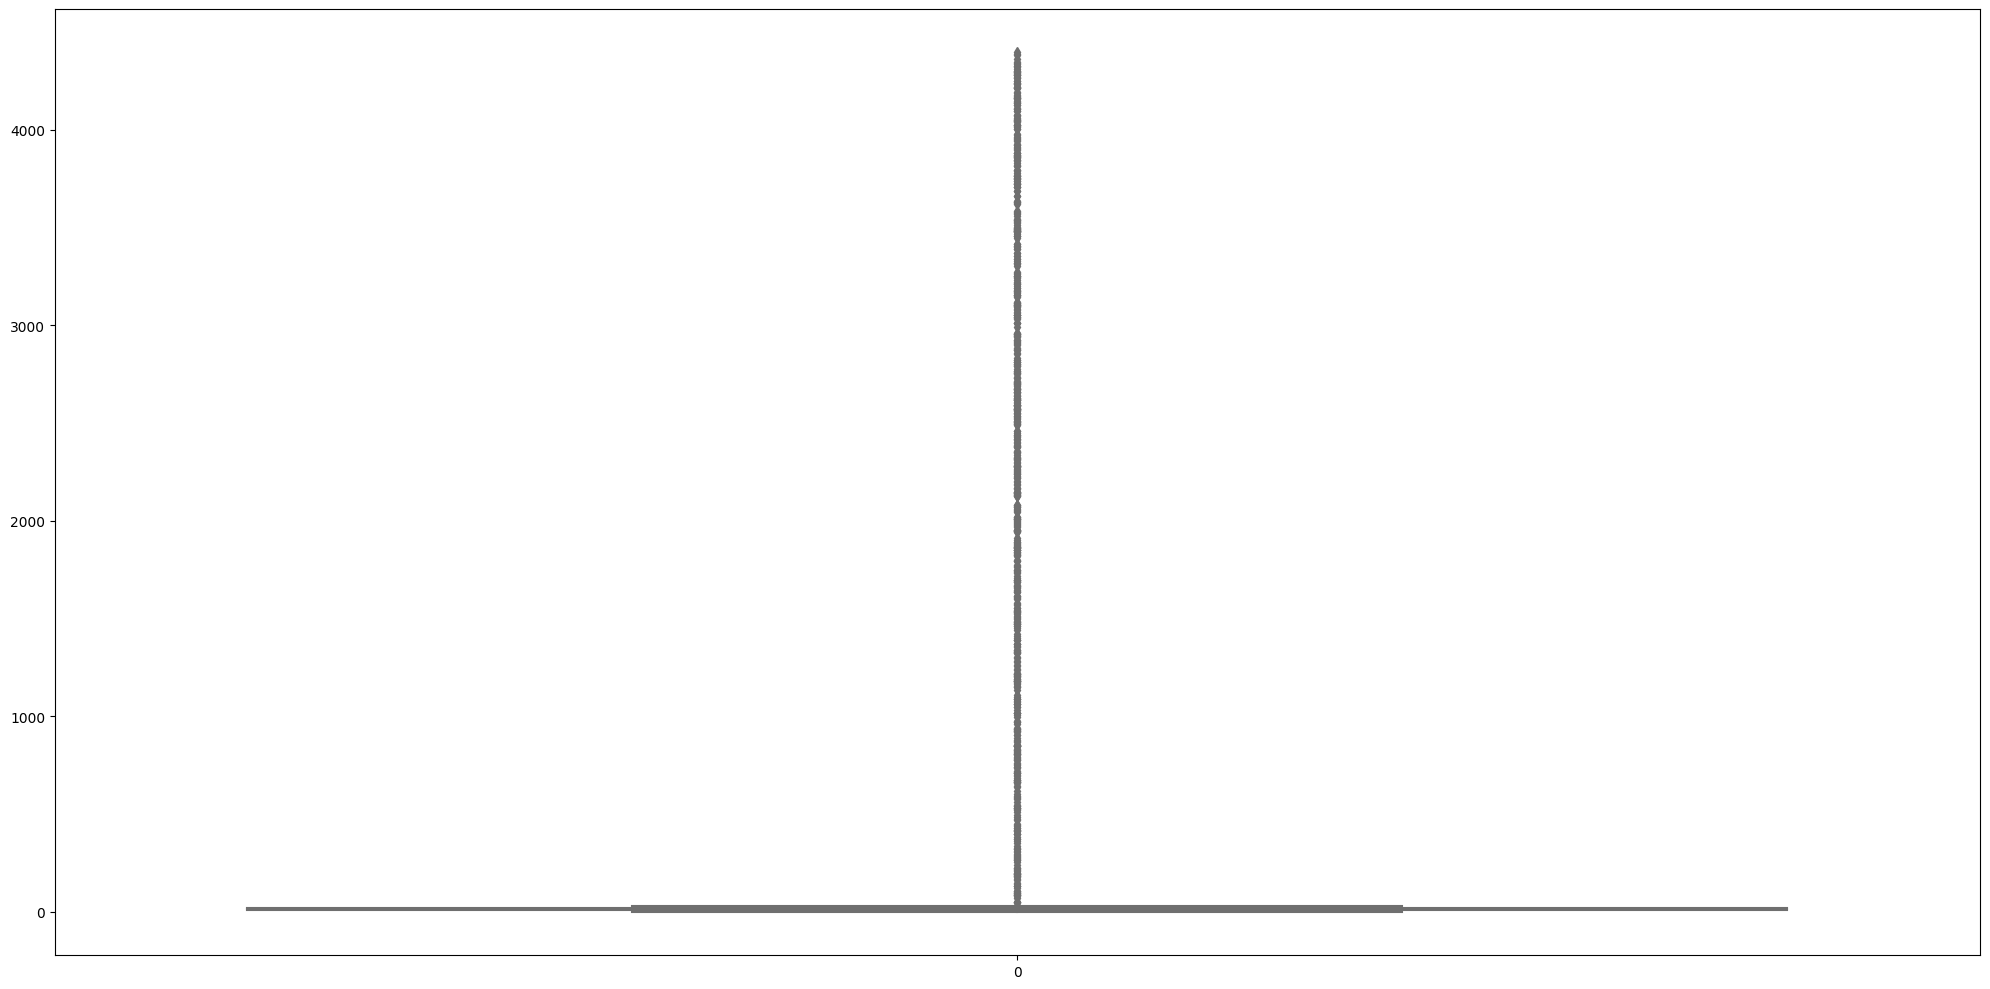

In [146]:
#Num_of_Delayed_Payment
column_name = 'Num_of_Delayed_Payment'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Sampah _ is replaced with Blank

Datatype of Changed_Credit_Limit is changed to float

Sebelum diisi: 2091

Sesudah diisi: 0
0        0.134183
1        0.134183
2        0.144108
3        0.609910
4        0.134183
           ...   
99995    0.168411
99996    0.168411
99997    0.168411
99998    0.168411
99999    0.168411
Name: Changed_Credit_Limit, Length: 100000, dtype: float64


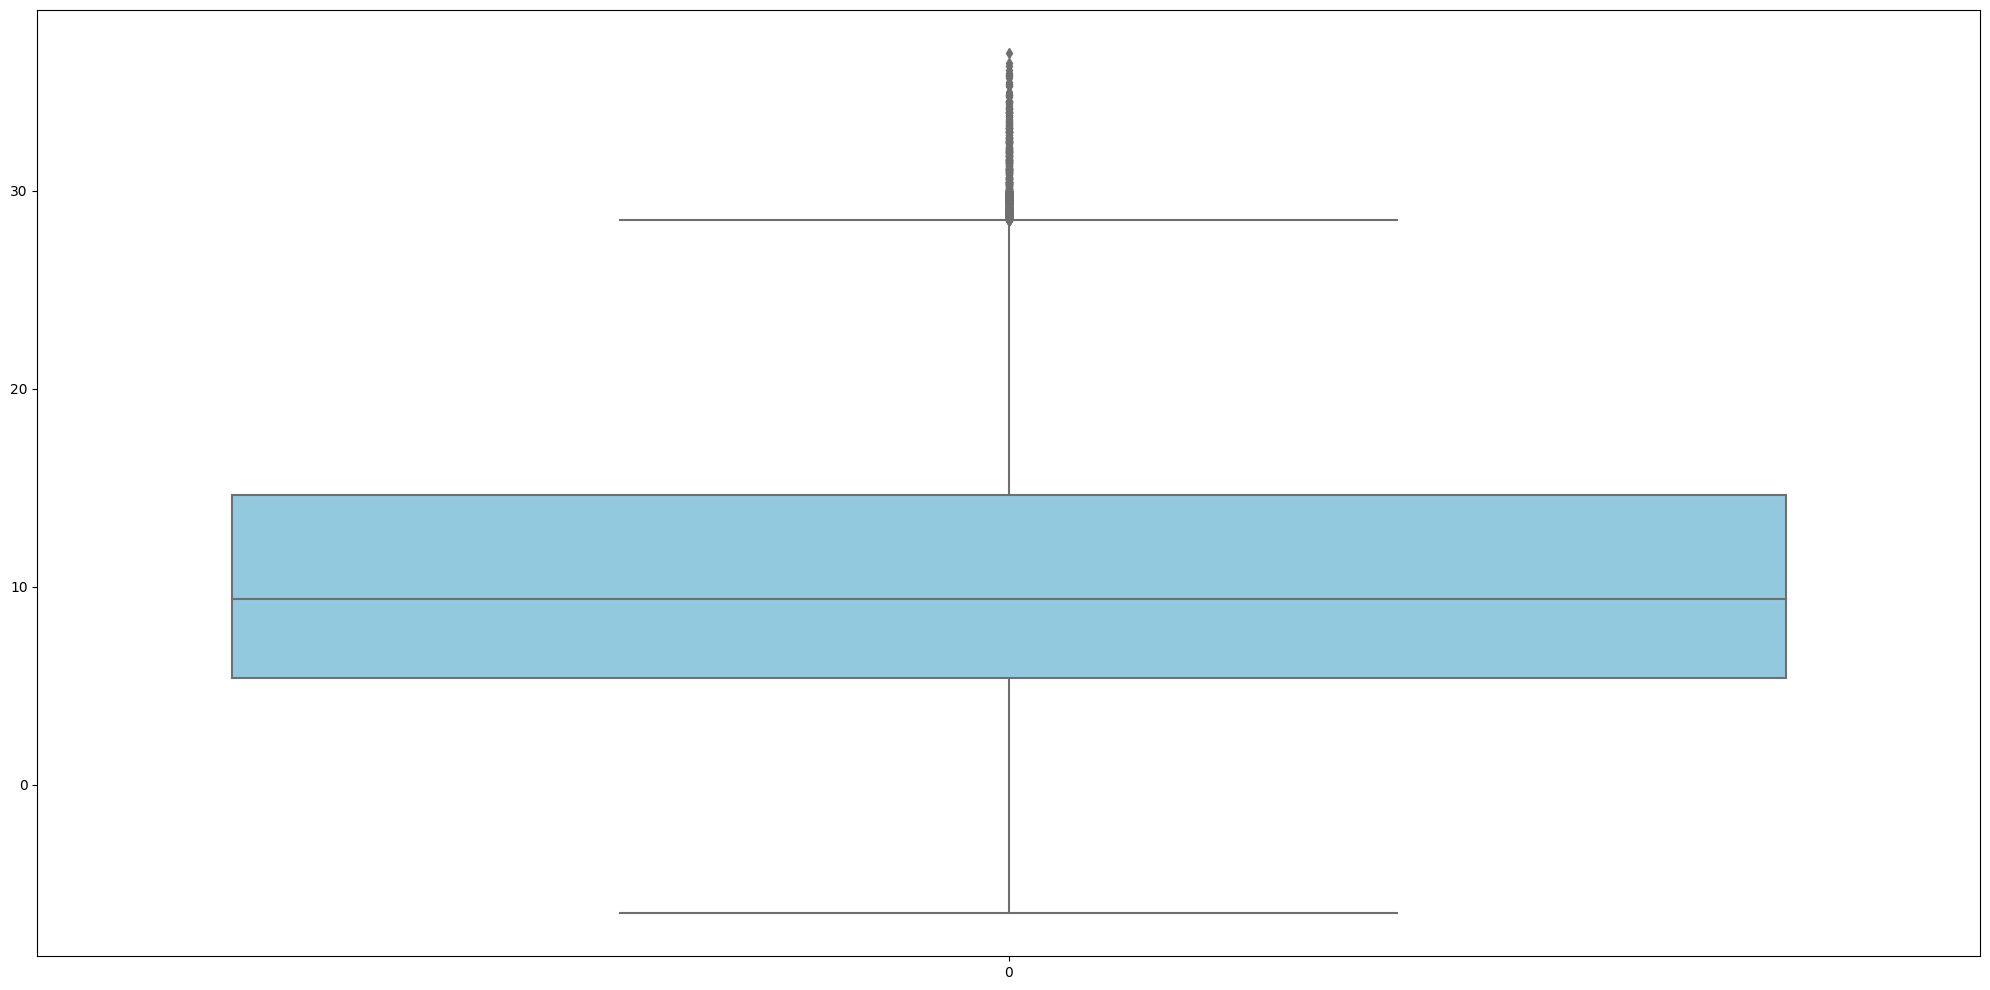

In [147]:
#Changed_Credit_Limit
column_name = 'Changed_Credit_Limit'
sampah = '_'
regex(df_train, column_name, sampah)
df_train['Changed_Credit_Limit']=pd.to_numeric(df_train['Changed_Credit_Limit'], errors='coerce')
num_process(df_train, column_name,  strip='_',datatype='float')
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Num_Credit_Inquiries is changed to <class 'float'>

Sebelum diisi: 1965

Sesudah diisi: 0
0        0.121943
1        0.121943
2        0.121943
3        0.121943
4        0.121943
           ...   
99995    0.127170
99996    0.127170
99997    0.127170
99998    0.127170
99999    0.127170
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64


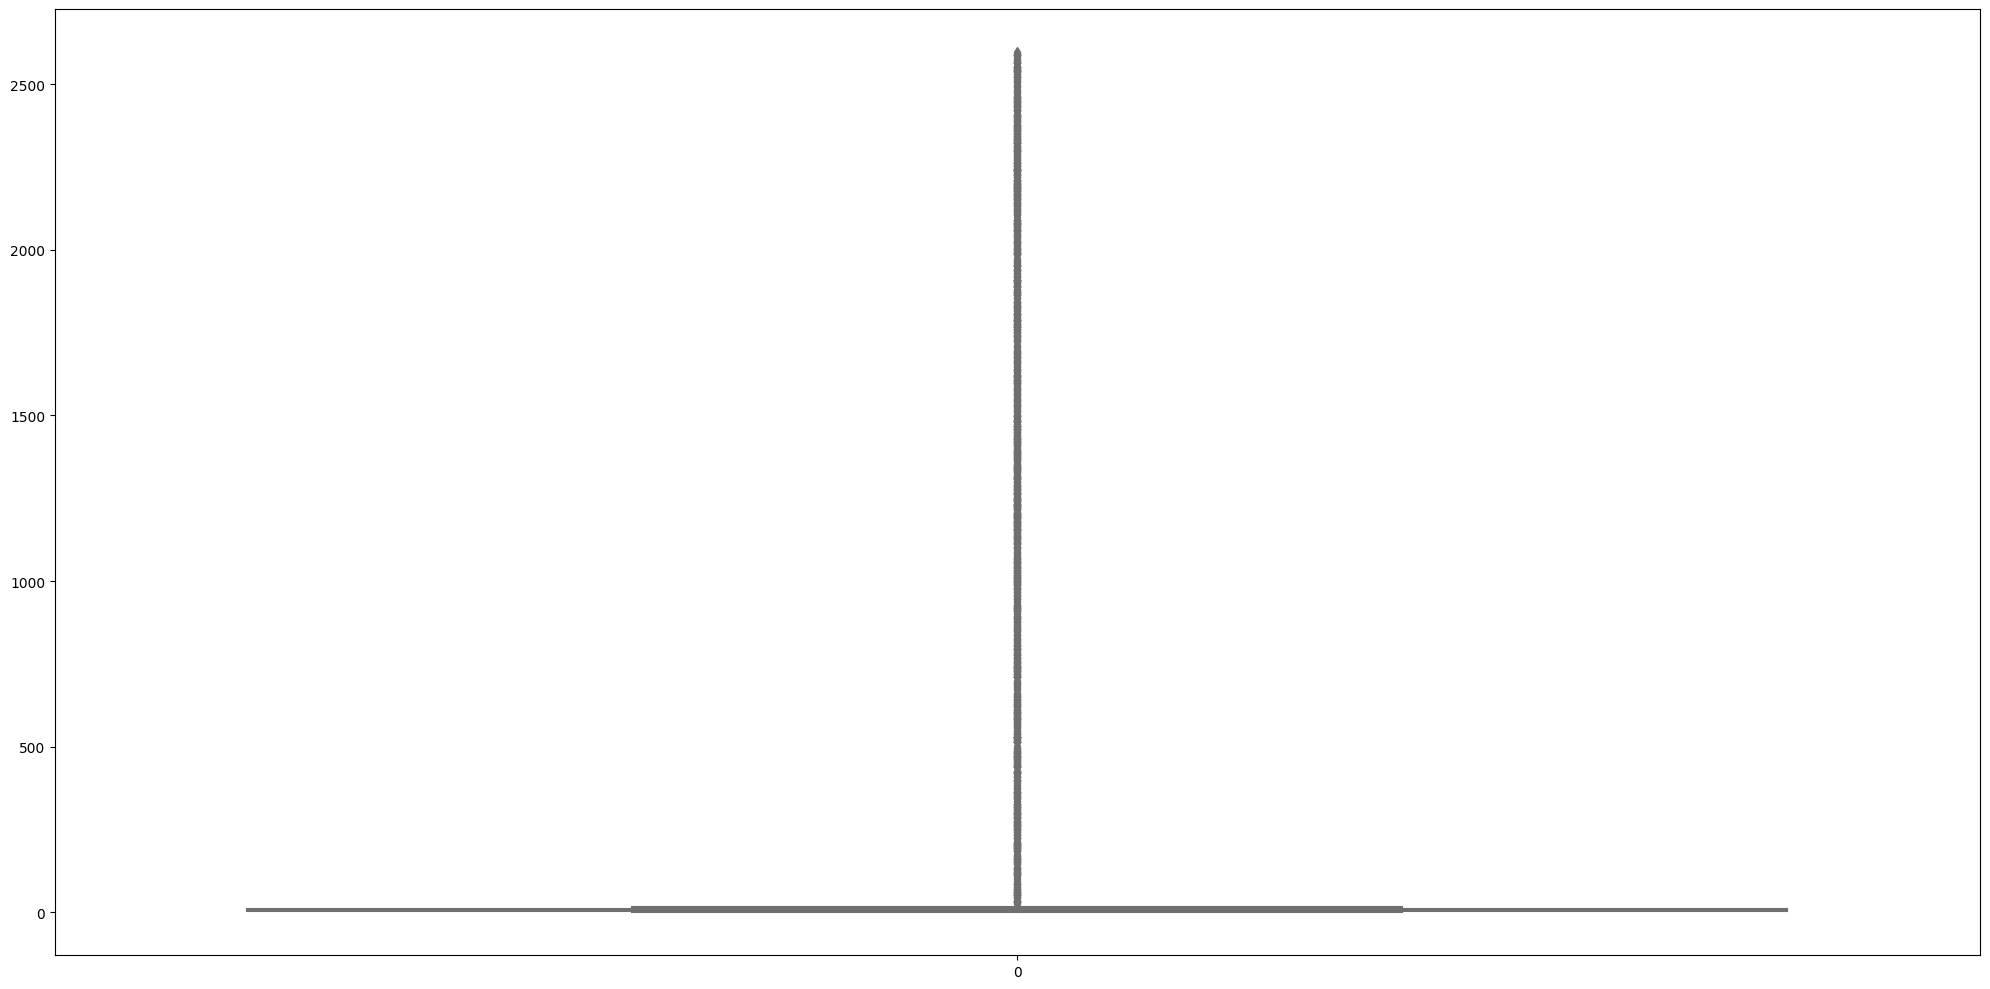

In [148]:
#Num_Credit_Inquiries
column_name = 'Num_Credit_Inquiries'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.533485
1        0.533485
2        0.533485
3        0.533485
4        0.533485
           ...   
99995    0.799776
99996    0.799776
99997    0.799776
99998    0.799776
99999    0.799776
Name: Outstanding_Debt, Length: 100000, dtype: float64


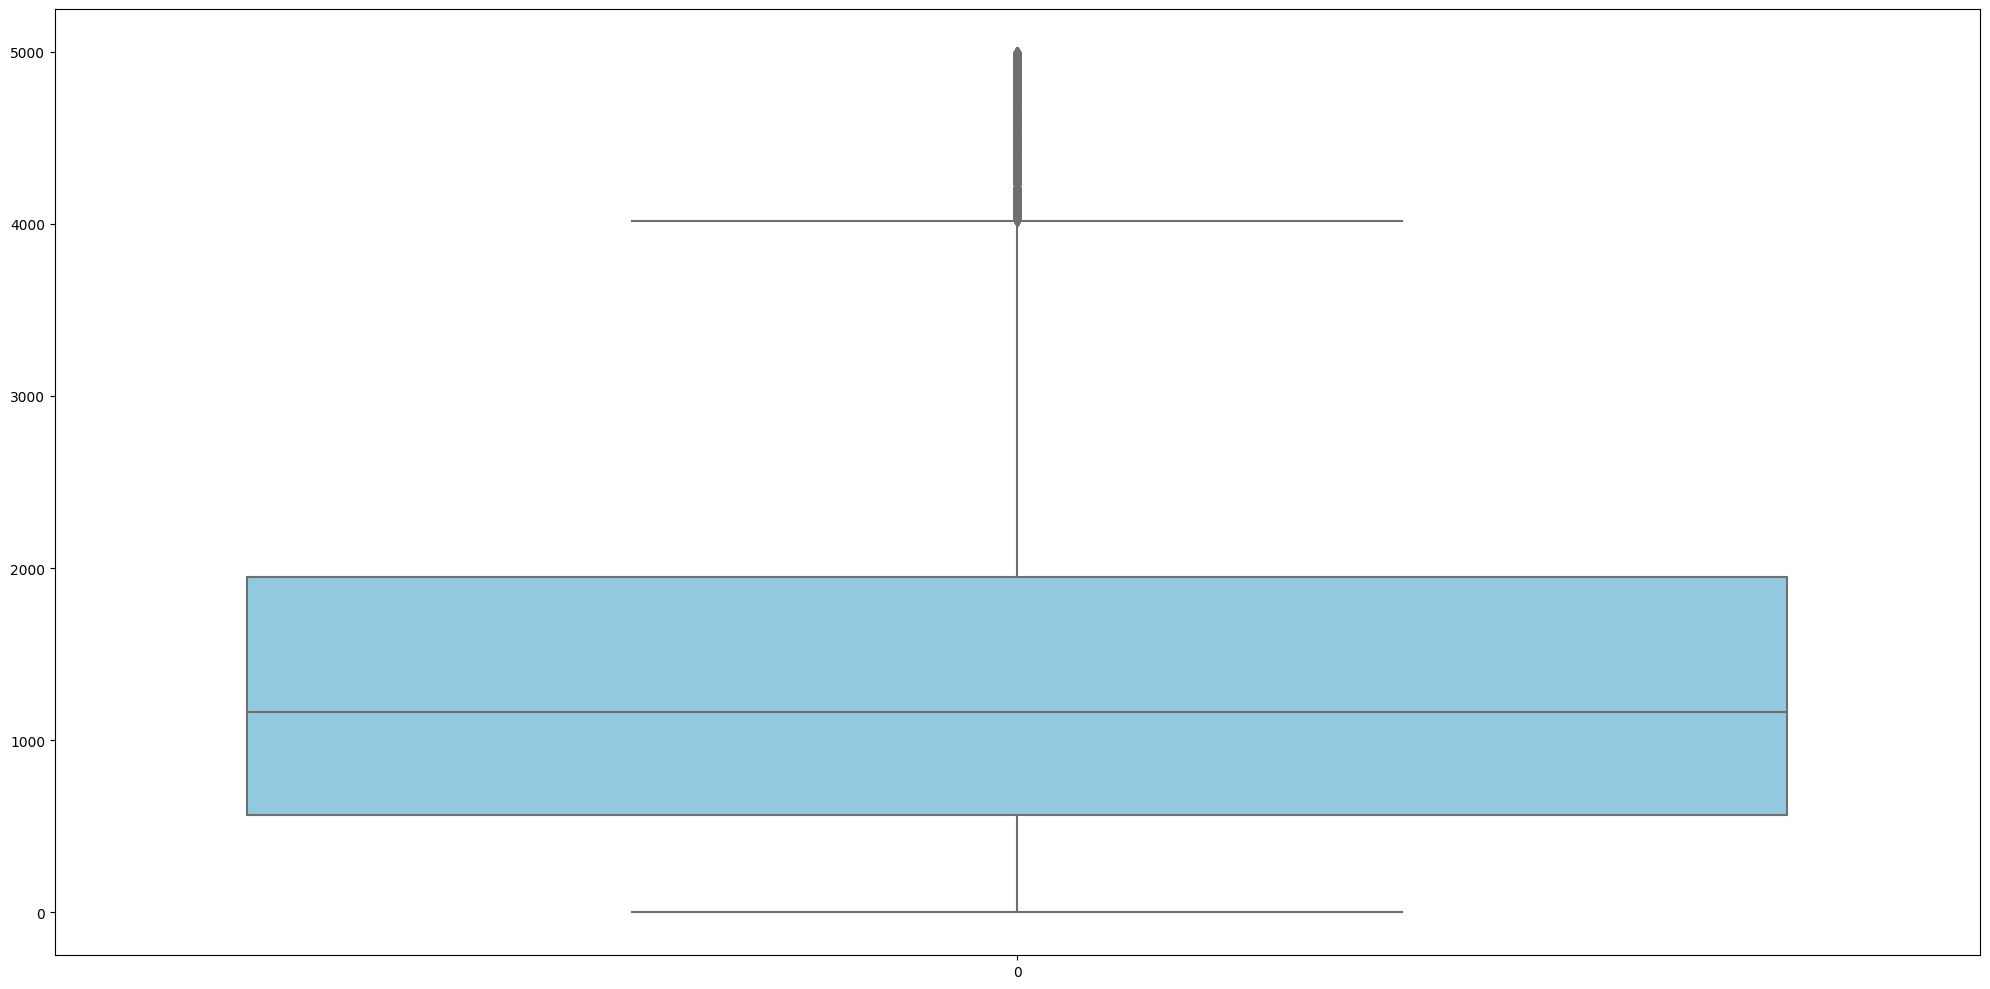

In [149]:
#Outstanding_Debt
column_name = 'Outstanding_Debt'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Credit_Utilization_Ratio is changed to <class 'float'>

Sebelum diisi: 0

Sesudah diisi: 0
0        1.067562
1        0.066489
2        0.718376
3        0.177318
4        1.463366
           ...   
99995    0.464817
99996    1.618273
99997    1.753100
99998    0.264427
99999    0.372747
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64


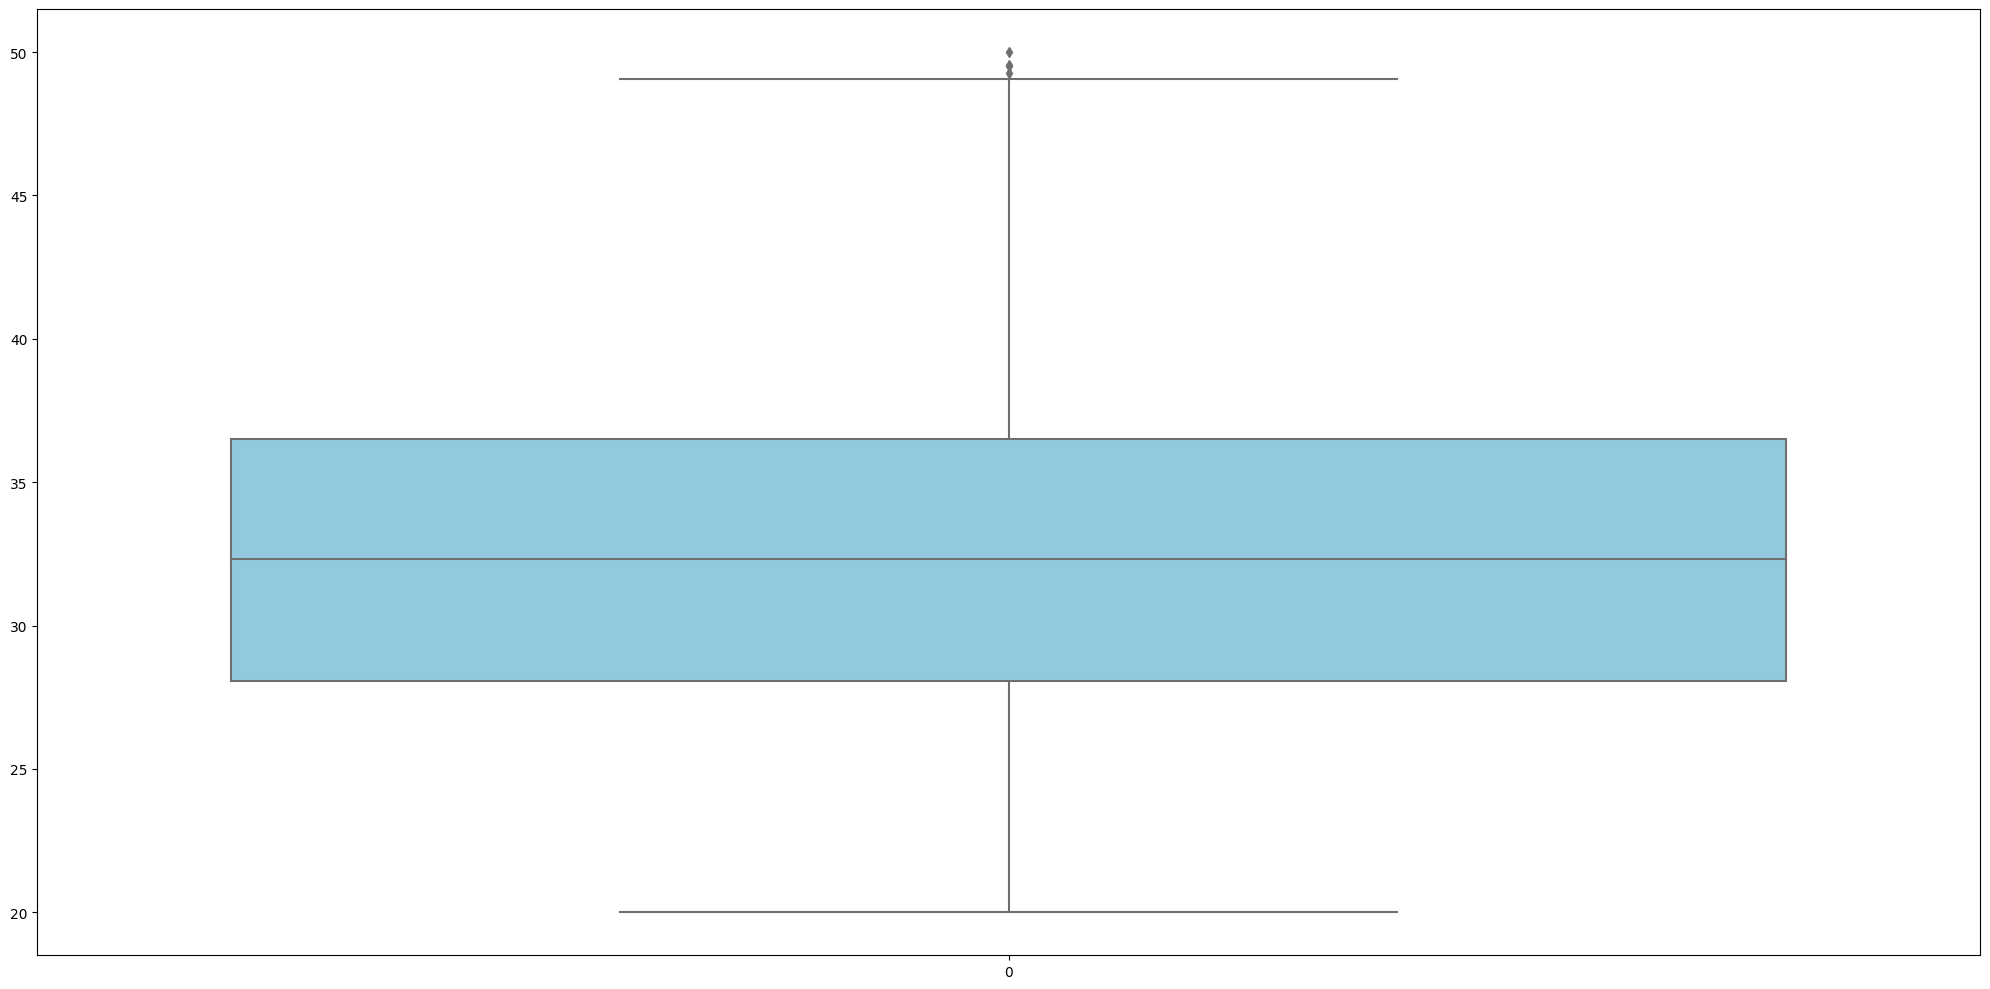

In [150]:
#Credit_Utilization_Ratio
column_name = 'Credit_Utilization_Ratio'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Datatype of Total_EMI_per_month is changed to <class 'float'>

Sebelum diisi: 0

Sesudah diisi: 0
0        0.162960
1        0.162960
2        0.162960
3        0.162960
4        0.162960
           ...   
99995    0.164702
99996    0.164702
99997    0.164702
99998    0.164702
99999    0.164702
Name: Total_EMI_per_month, Length: 100000, dtype: float64


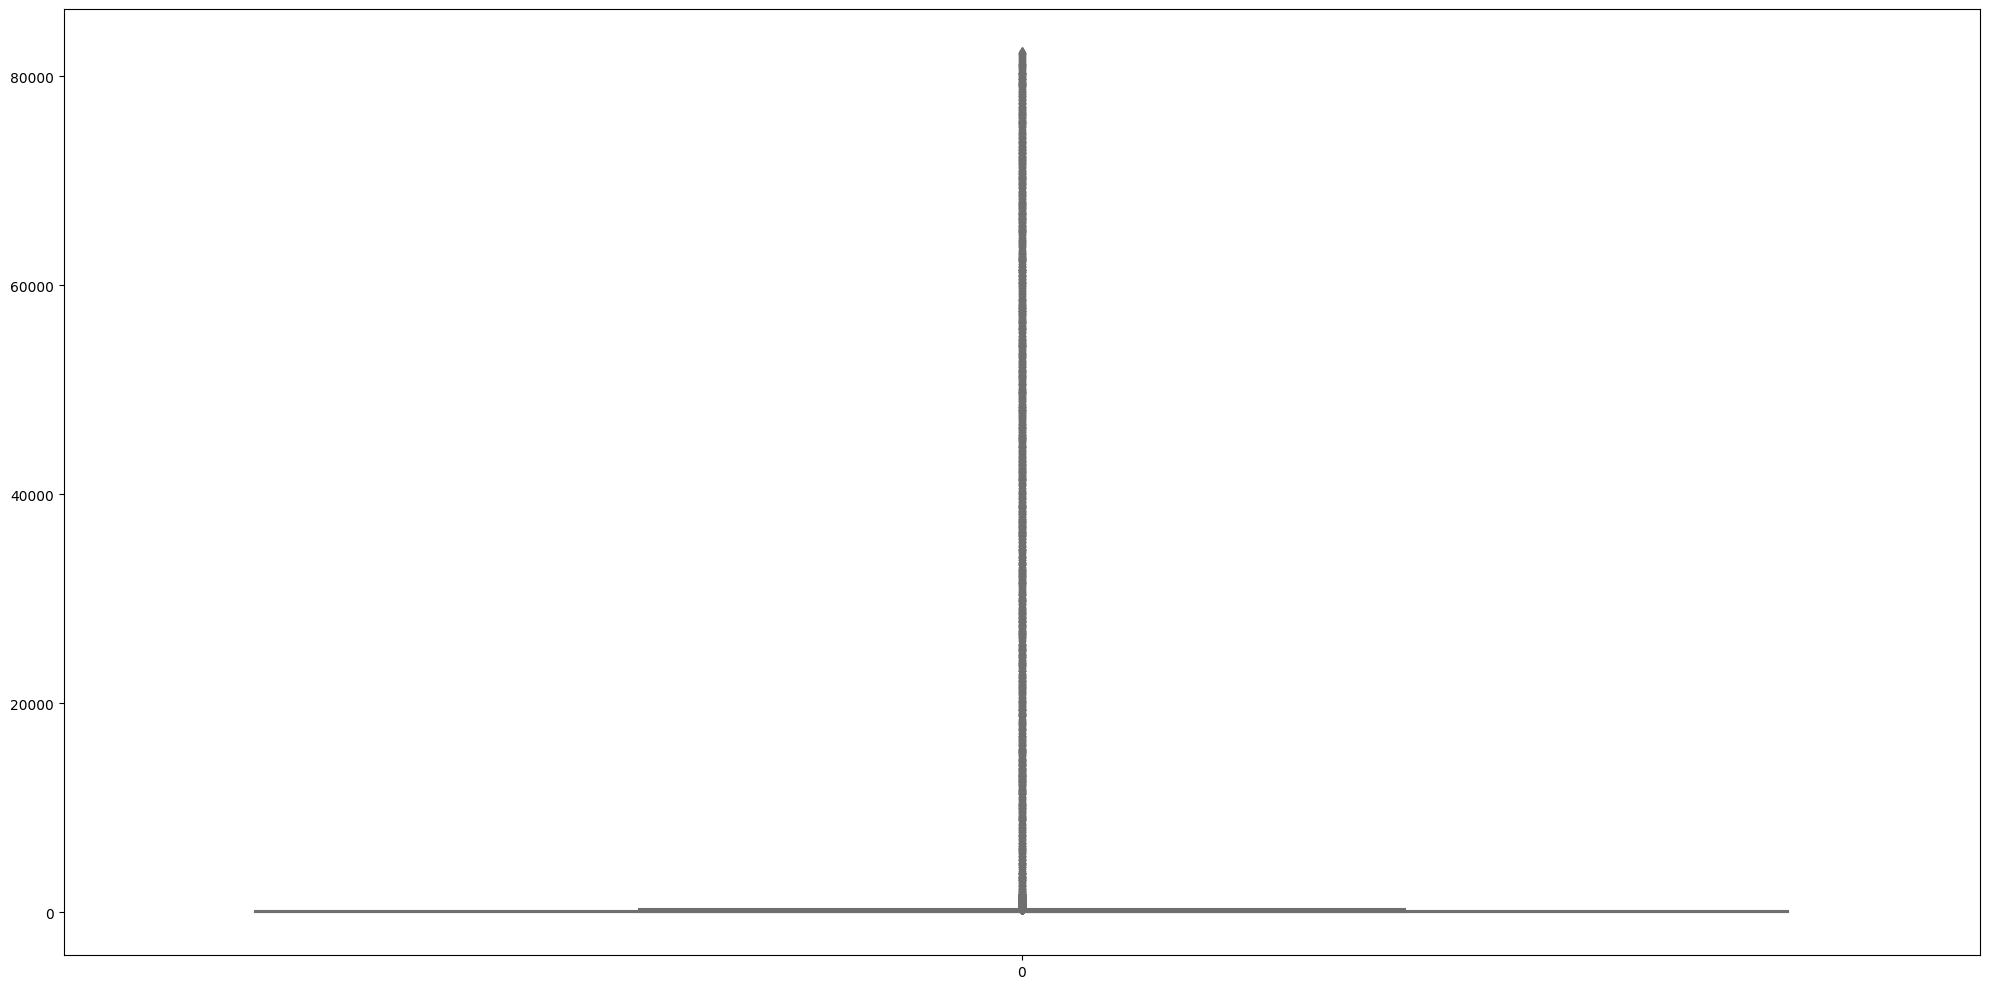

In [151]:
#Total_EMI_per_month
column_name = 'Total_EMI_per_month'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Sebelum diisi: 4479

Sesudah diisi: 0
0        0.267306
1        0.248371
2        0.266664
3        0.207776
4        0.286806
           ...   
99995    0.277029
99996    0.280422
99997    0.295503
99998    0.181665
99999    0.223925
Name: Amount_invested_monthly, Length: 100000, dtype: float64


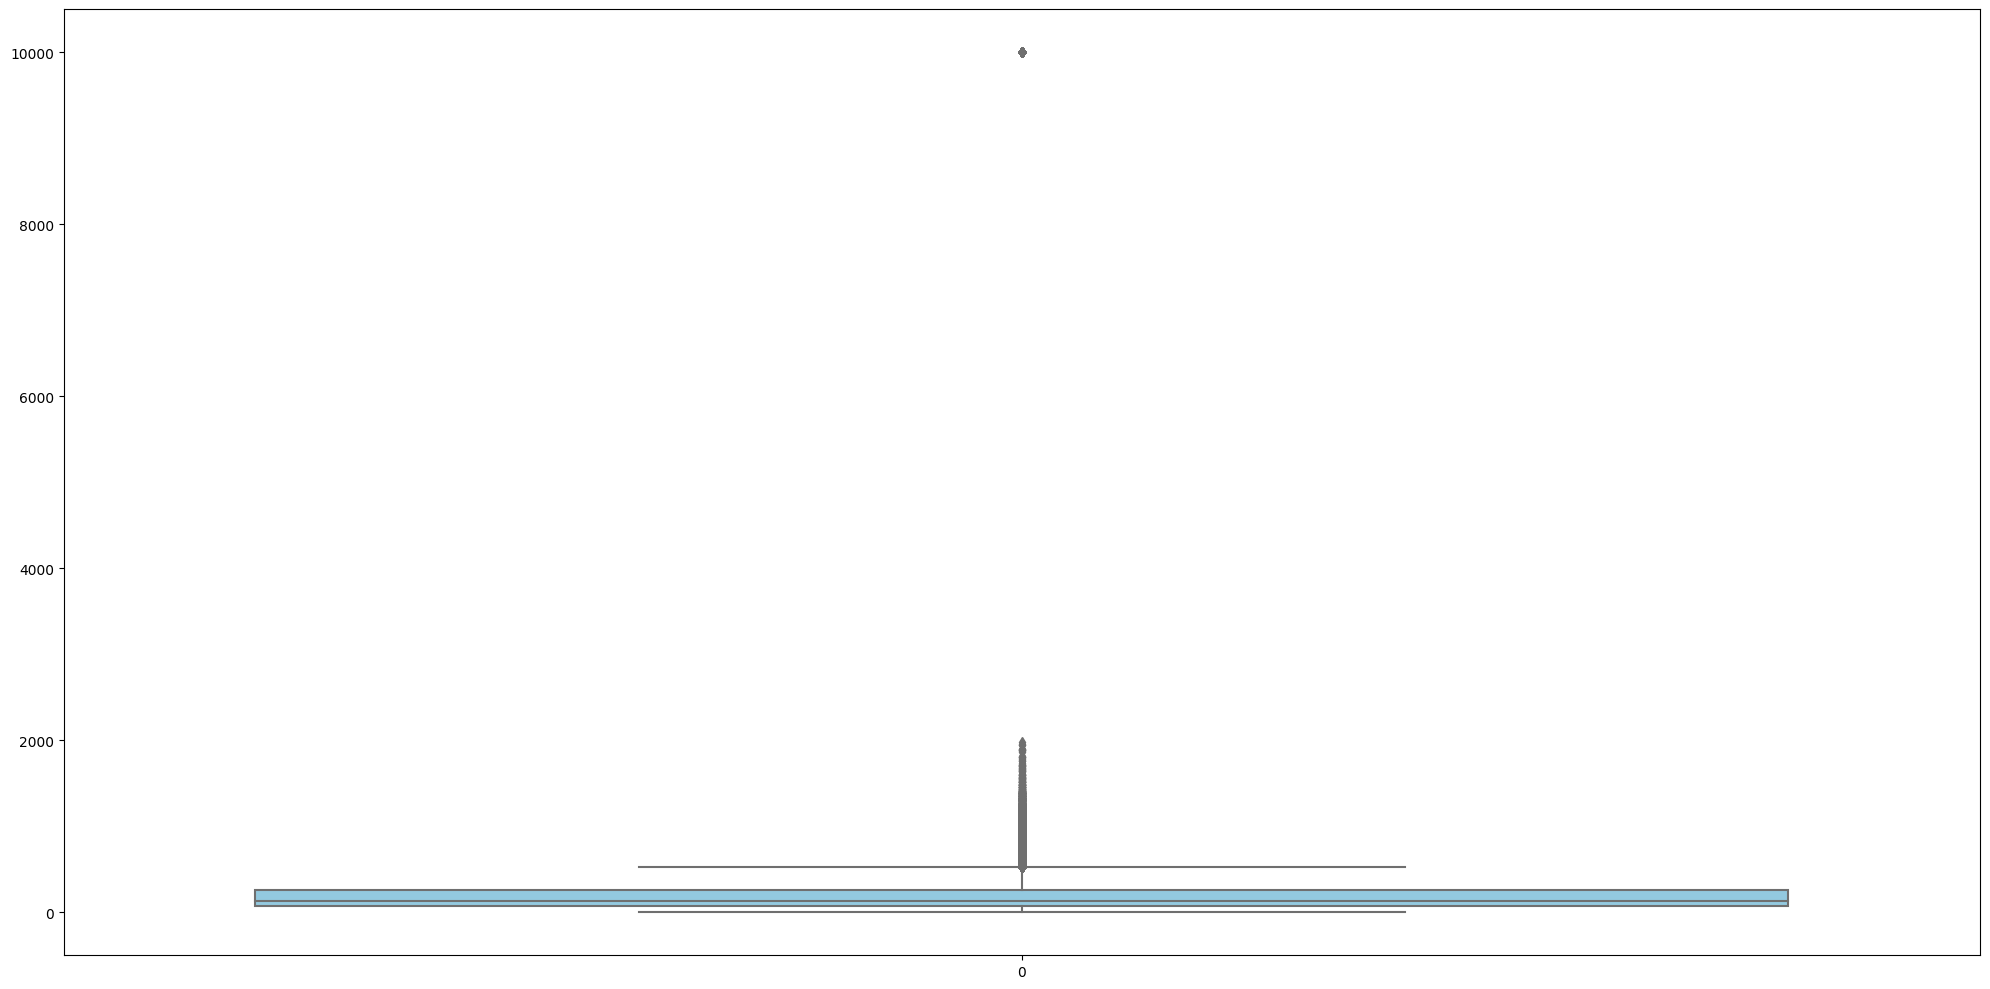

In [152]:
#note : didrop karena outliers
#Amount_invested_monthly
column_name = 'Amount_invested_monthly'


num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)


Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>

Sebelum diisi: 2868

Sesudah diisi: 0
0        0.009487
1        0.009487
2        0.009487
3        0.009487
4        0.009487
           ...   
99995    0.009487
99996    0.009487
99997    0.009487
99998    0.009487
99999    0.009487
Name: Monthly_Balance, Length: 100000, dtype: float64


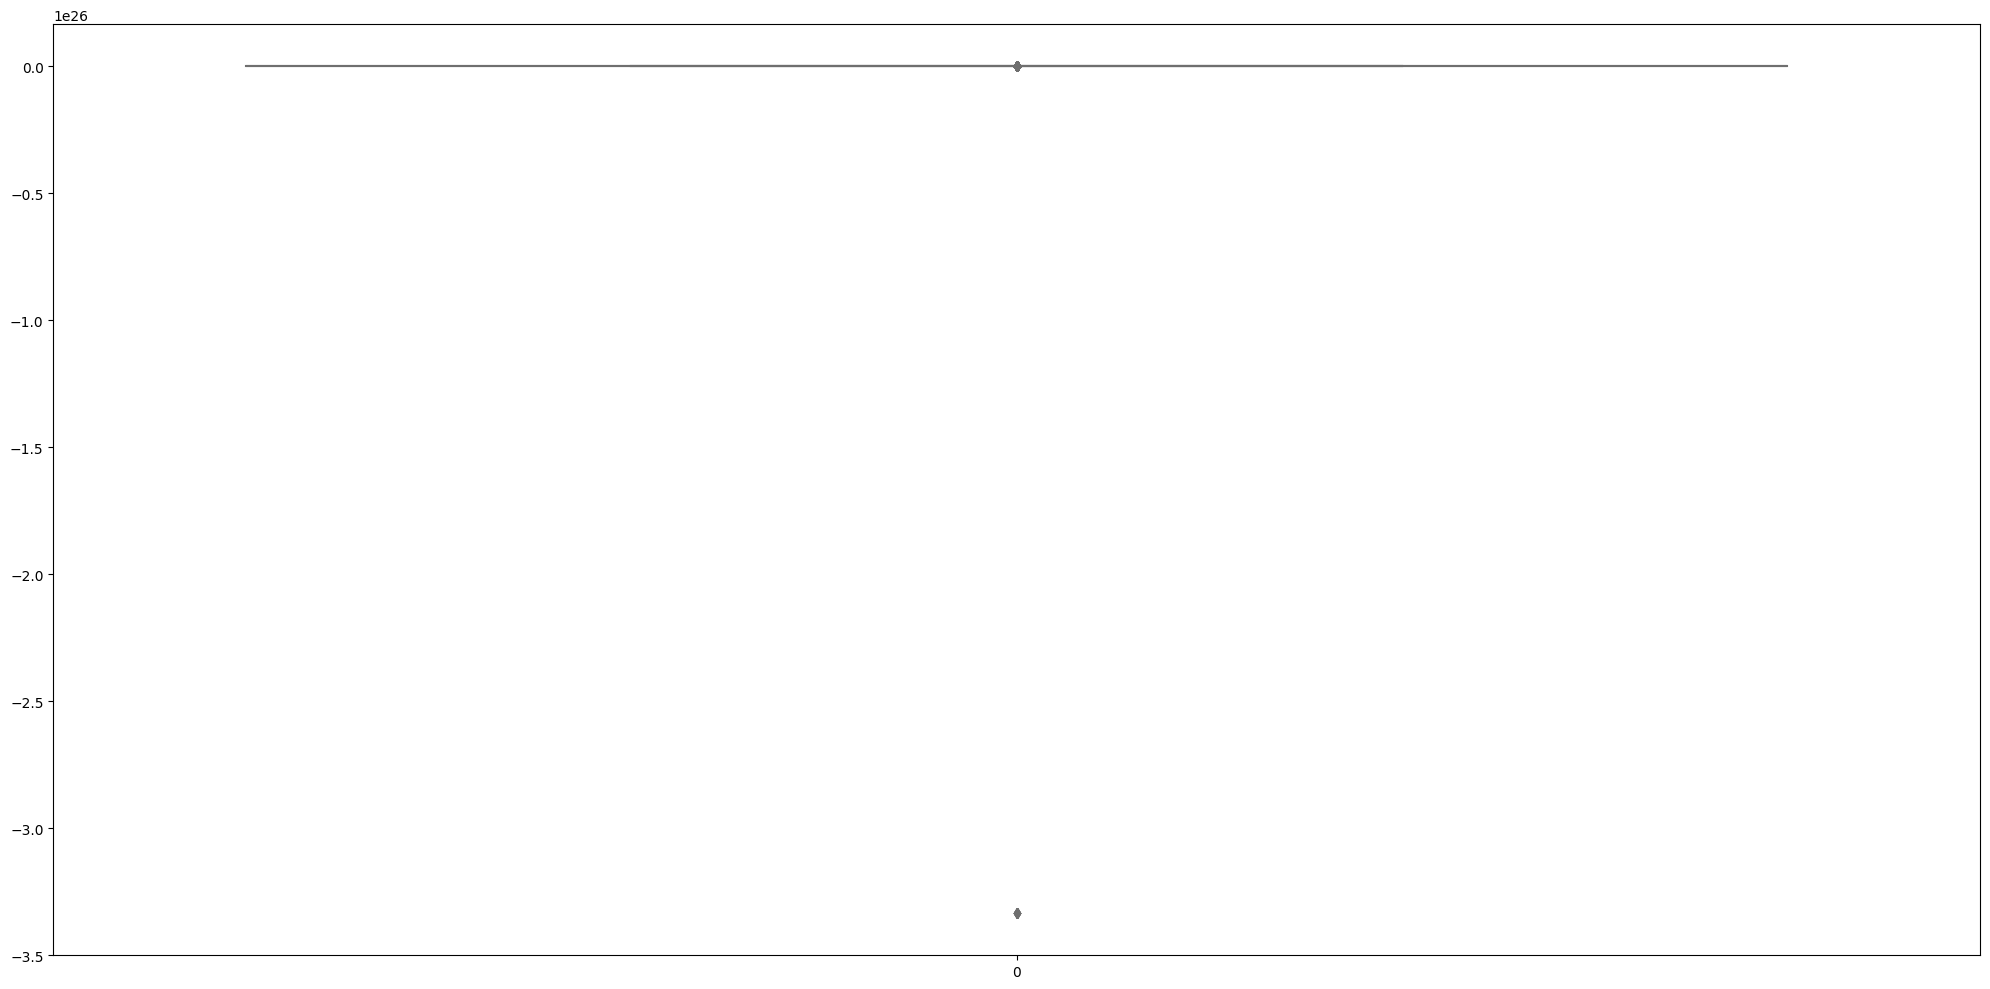

In [153]:
#Monthly_Balance
column_name = 'Monthly_Balance'

num_process(df_train, column_name, strip='_', datatype=float)
fill_missing(df_train, column_name)
plot(df_train, column_name)

In [154]:
# def reduce_pca(df):
#     pca=PCA(n_components=0.95)
#     numpy_arr=pca.fit_transform(df)
#     df_reduced=pd.DataFrame(data=numpy_arr.flatten())
#     return df_reduced
# reduce_pca(df_train)

#Multicolinearity

In [155]:
from sklearn.model_selection import train_test_split
feature = df_train.drop(columns='Credit_Score')
target = df_train[['Credit_Score']]

feature_cs_train, feature_cs_test, target_cs_train, target_cs_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [156]:
#pengecekan VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X=add_constant(feature_cs_train)

vif_df=pd.DataFrame([vif(X.values, i)
                     for i in range(X.shape[1])],
                    index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='const']
vif_df

c:\Users\root\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif_score
1,Month,0.205625
2,Age,0.974615
3,Occupation,0.281711
4,Annual_Income,0.985009
5,Monthly_Inhand_Salary,0.349668
6,Num_Bank_Accounts,0.979014
7,Num_Credit_Card,0.970467
8,Interest_Rate,0.976409
9,Num_of_Loan,0.997760
10,Type_of_Loan,0.240241


In [157]:
# df_train.to_excel('creditscore_output.xlsx', engine='xlsxwriter')  

In [158]:
df_train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [159]:
#Split Input & Output Data
X = df_train.drop('Credit_Score',axis=1)

In [160]:
# #Normalize Data
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
# scaler2 = StandardScaler()
# X = scaler.fit_transform(X)

#Clustering

[0 0 0 ... 0 0 0]
Nilai Silhouette Score n_cluster=2 adalah = 1.0
Nilai DBI =  7.494724534243761e-22
[2 2 2 ... 2 2 2]
Nilai Silhouette Score n_cluster=3 adalah = 1.0
Nilai DBI =  7.494724534243761e-22


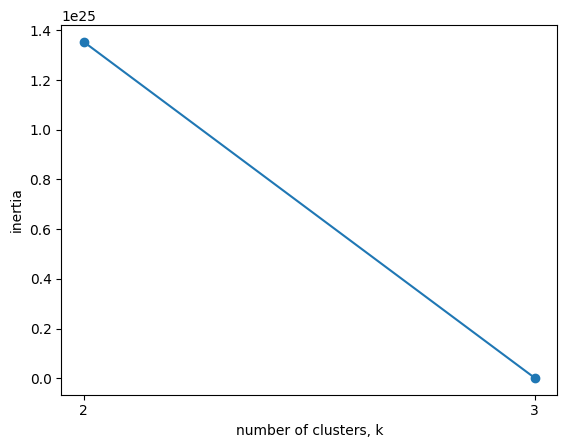

In [161]:
#kmeans clustering
# def kmeans_clustering(X):
inertia=[]
K=range(2,4)
for num_cluster in K:
    kmeans=KMeans(n_clusters=num_cluster, max_iter=50, init='k-means++',n_init=10, random_state=0, algorithm="elkan")
    kmeans.fit(X)
    kluster = kmeans.predict(X)
    inertia.append(kmeans.inertia_)
    s_score = silhouette_score(X, kluster)
    dbi = davies_bouldin_score(X, kluster)
    # label_0=X(kluster==0)
    # label_1=X(kluster==1)
    # label_2=X(kluster==2)
        
    print(kluster)
    # cols =filtered_label0.columns
    # plt.scatter(label_0[cols[0]], label_0[cols[1]], color='red' )
    # plt.scatter(label_1[cols[0]], label_1[cols[1]], color='black' )
        
    print("Nilai Silhouette Score n_cluster={0} adalah = {1}".format(num_cluster, s_score))
    print("Nilai DBI = ",dbi)
plt.plot(K, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(K)
plt.show()
# kmeans_clustering(X)

In [162]:
#AHC 
def ahc_clustering(X):
    K=range(2,4)
    for num_cluster in K:
        ahc=AgglomerativeClustering(n_clusters=num_cluster, linkage='single')
        ahc.fit(X)
        kluster = ahc.labels_
        
        s_score = silhouette_score(X, kluster)
        dbi = davies_bouldin_score(X, kluster)
        print("Nilai Silhouette Score n_cluster={0} adalah = {1}".format(num_cluster, s_score))
        print("Nilai DBI = ",dbi)
ahc_clustering(X)

Nilai Silhouette Score n_cluster=2 adalah = 1.0
Nilai DBI =  7.494724534243761e-22
Nilai Silhouette Score n_cluster=3 adalah = 0.9923786472450468
Nilai DBI =  0.20837005707843684
